# Toronto Traffic Collisions: Machine Learning


This notebook will be used for the ML 3253 course for U of T. We will use the Toronto Police traffic collision dataset of seriously injured or killed (KSI) accidents to try to predict when accidents involve a fatality.

In [ ]:
# Importing libraries and setting up paramters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

np.random.seed(404)

# Importing data

The CSV files to github to easily import without having to upload files into colab

In [ ]:
# Importing data
ksi = pd.read_csv("https://raw.githubusercontent.com/seanharrigan/ml_toronto_ksi/main/KSI%20(Original_%20Raw).csv")
wthr = pd.read_csv("https://raw.githubusercontent.com/seanharrigan/ml_toronto_ksi/main/Toronto_temp%20(original_raw)%20(1).csv")
holidays = pd.read_csv("https://raw.githubusercontent.com/uWaterloo/Datasets/master/Holidays/holidays.csv")

In [ ]:
# View data
ksi.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,-8.829728e+06,5.419071e+06,3389067,893184,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,1
1,-8.829728e+06,5.419071e+06,3389068,893184,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,2
2,-8.854874e+06,5.414091e+06,3442993,913296,2006,2006/06/25 04:00:00+00,2040,29 BLAIR ATHOL Cres,NaN,NaN,...,NaN,NaN,NaN,NaN,10,Princess-Rosethorn,10,Princess-Rosethorn (10),D22,3
3,-8.829728e+06,5.419071e+06,3389069,893184,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,4
4,-8.829728e+06,5.419071e+06,3389070,893184,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,5


In [ ]:
# Data shape
ksi.shape

(17488, 57)

In [ ]:
# Missing values
ksi.isna().sum().sort_values()

X                        0
NEIGHBOURHOOD_140        0
HOOD_140                 0
NEIGHBOURHOOD_158        0
HOOD_158                 0
DIVISION                 0
INVAGE                   0
LIGHT                    0
LONGITUDE                0
LATITUDE                 0
ObjectId                 0
DATE                     0
Y                        0
YEAR                     0
ACCNUM                   0
INDEX_                   0
STREET1                  0
TIME                     0
IMPACTYPE                4
ACCLASS                  7
INVTYPE                 14
VISIBILITY              18
RDSFCOND                23
TRAFFCTL                34
DISTRICT                35
LOCCOORD                95
ROAD_CLASS             376
WARDNUM                525
STREET2               1592
INJURY                1611
AUTOMOBILE            1628
VEHTYPE               3033
INITDIR               4937
ACCLOC                5450
MANOEUVER             7405
AG_DRIV               8449
DRIVACT               8666
D

In [ ]:
# KSI info
ksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17488 entries, 0 to 17487
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  17488 non-null  float64
 1   Y                  17488 non-null  float64
 2   INDEX_             17488 non-null  int64  
 3   ACCNUM             17488 non-null  int64  
 4   YEAR               17488 non-null  int64  
 5   DATE               17488 non-null  object 
 6   TIME               17488 non-null  int64  
 7   STREET1            17488 non-null  object 
 8   STREET2            15896 non-null  object 
 9   OFFSET             3028 non-null   object 
 10  ROAD_CLASS         17112 non-null  object 
 11  DISTRICT           17453 non-null  object 
 12  WARDNUM            16963 non-null  float64
 13  LATITUDE           17488 non-null  float64
 14  LONGITUDE          17488 non-null  float64
 15  LOCCOORD           17393 non-null  object 
 16  ACCLOC             120

In [ ]:
ksi['DATE']

0        2006/01/01 05:00:00+00
1        2006/01/01 05:00:00+00
2        2006/06/25 04:00:00+00
3        2006/01/01 05:00:00+00
4        2006/01/01 05:00:00+00
                  ...          
17483    2021/10/15 04:00:00+00
17484    2021/10/15 04:00:00+00
17485    2021/10/15 04:00:00+00
17486    2021/10/15 04:00:00+00
17487    2021/10/16 04:00:00+00
Name: DATE, Length: 17488, dtype: object

In [ ]:
wthr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          2889 non-null   object 
 1   Year               2889 non-null   object 
 2   Month              2889 non-null   int64  
 3   Day                2889 non-null   int64  
 4   Mean Temp (C)      2876 non-null   float64
 5   Max Temp (C)       2877 non-null   float64
 6   Min Temp (C)       2877 non-null   float64
 7   Total Rain (mm)    2863 non-null   float64
 8   Total Snow (cm)    2871 non-null   float64
 9   Total Precip (mm)  2865 non-null   float64
 10  season             2889 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 248.4+ KB


In [ ]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     198 non-null    object
 1   holiday  198 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [ ]:
holidays.head(5)

,date,holiday
0,2012-01-02,New Year's Day
1,2012-02-20,Family Day
2,2012-04-06,Good Friday
3,2012-05-21,Victoria Day
4,2012-07-02,Canada Day


# Data preperation and pre-processing




# Cleaning data


In [ ]:
# Renaming data
df = ksi

# Setting all column names to lower case
df.columns= df.columns.str.lower()

# Fixing date variable
df['date'] = pd.to_datetime(df.date, utc = True)

In [ ]:
# Fill the NaN with 0 then cast to int via https://stackoverflow.com/a/43835056
df['wardnum'] = pd.to_numeric(df['wardnum'], errors='coerce').fillna(0).astype(int)

display(df['wardnum'].unique())
display(df['wardnum'].unique().size)

# Wardnum is now a int with 0 filled in (0 means nothing)
# For location the neighbourhood number (hood_140 or hood_158) might be better
# https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/about-toronto-neighbourhoods/
# hood_140 is the correct numbering for our data time span. hood_158 has a little less missing data ('NSA')

hood140 = df[df['hood_140'] == 'NSA']
print("\nData rows with hood_140 being NSA: " + str(hood140['hood_140'].size))

hood158 = df[df['hood_158'] == 'NSA']
print("\nData rows with hood_158 being NSA: " + str(hood158['hood_158'].size))


array([      19,        2,       21,       10,      815,        5,
              4,        1,       18,       17,        3,       24,
           1621,        8,       12,       25,       11,        9,
            812,       15,       23,       13,        6,       14,
           1013,     2325,     2120,       16,       20,        7,
             22,    91110,     2223,      410,     1516,       76,
           2425,     2124,     1110,      911,     1113,      912,
           1722,       59,       89,      910,     1920,     1817,
            618,     1419,     1314,     1115,     2024,     1215,
           1620,       54,   111013,     1014,   162120,     8912,
           2324,     1211,   161920,       34,     4910,     2123,
             49, 17162221,    91211,      706,     1619,        0])

72


Data rows with hood_140 being NSA: 148

Data rows with hood_158 being NSA: 124


In [ ]:
# Data preperations (deriving variables, dropping columns, sorting, etc.)
df = (df
      # Dropping un-needed columns
      .drop(columns=['index_', 'objectid', 'cyccond', 'cycact', 'cyclistype', 'x', 'y'])
      # Sorty by date and accnum (this variable is crash ID)
      .sort_values(['date', 'accnum'], ascending = [True, True])
)

# Creating dervived variables
df = (df           
      .assign(
           # Creating variables
           month = df.date.dt.month, 
           day = df.date.dt.day, 
           wkday = df.date.dt.weekday,
           wkday_cat = df.date.dt.day_name(),
           # Outcome variable
           y_ksi = np.where(((df['injury'] == 'Major') | (df['injury'] == 'Fatal')), 1, 0),
           y_dth = np.where((df['injury'] == 'Fatal'), 1, 0),
           # Fixing missing values when appropriate
           # accloc = df.accloc.fillna('Not at intersection'), # unsure about this variable
           motorcycle = df.motorcycle.fillna('Not at intersection'),
           truck = df.truck.fillna('No'),
           trsn_city_veh = df.trsn_city_veh.fillna('No'),
           emerg_veh = df.emerg_veh.fillna('No'),
           passenger = df.passenger.fillna('No'),
           speeding = df.speeding.fillna('No'),
           ag_driv = df.ag_driv.fillna('No'),
           redlight = df.redlight.fillna('No'),
           alcohol = df.alcohol.fillna('No'),
           disability = df.disability.fillna('No'),
           automobile = df.automobile.fillna('No'),
           pedestrian = df.pedestrian.fillna('No'),
           cyclist = df.cyclist.fillna('No')
      )               
)


df.head()

,accnum,year,date,time,street1,street2,offset,road_class,district,wardnum,...,neighbourhood_158,hood_140,neighbourhood_140,division,month,day,wkday,wkday_cat,y_ksi,y_dth
0,893184,2006,2006-01-01 05:00:00+00:00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,19,...,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,1,1,6,Sunday,1,0
1,893184,2006,2006-01-01 05:00:00+00:00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,19,...,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,1,1,6,Sunday,0,0
3,893184,2006,2006-01-01 05:00:00+00:00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,19,...,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,1,1,6,Sunday,0,0
4,893184,2006,2006-01-01 05:00:00+00:00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,19,...,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,1,1,6,Sunday,0,0
6,893184,2006,2006-01-01 05:00:00+00:00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,19,...,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,1,1,6,Sunday,0,0


In [ ]:
df.dtypes

accnum                             int64
year                               int64
date                 datetime64[ns, UTC]
time                               int64
street1                           object
street2                           object
offset                            object
road_class                        object
district                          object
wardnum                            int64
latitude                         float64
longitude                        float64
loccoord                          object
accloc                            object
traffctl                          object
visibility                        object
light                             object
rdsfcond                          object
acclass                           object
impactype                         object
invtype                           object
invage                            object
injury                            object
fatal_no                         float64
initdir         

In [ ]:
df.columns

Index(['accnum', 'year', 'date', 'time', 'street1', 'street2', 'offset',
       'road_class', 'district', 'wardnum', 'latitude', 'longitude',
       'loccoord', 'accloc', 'traffctl', 'visibility', 'light', 'rdsfcond',
       'acclass', 'impactype', 'invtype', 'invage', 'injury', 'fatal_no',
       'initdir', 'vehtype', 'manoeuver', 'drivact', 'drivcond', 'pedtype',
       'pedact', 'pedcond', 'pedestrian', 'cyclist', 'automobile',
       'motorcycle', 'truck', 'trsn_city_veh', 'emerg_veh', 'passenger',
       'speeding', 'ag_driv', 'redlight', 'alcohol', 'disability', 'hood_158',
       'neighbourhood_158', 'hood_140', 'neighbourhood_140', 'division',
       'month', 'day', 'wkday', 'wkday_cat', 'y_ksi', 'y_dth'],
      dtype='object')

In [ ]:
# Removing rows with holiday == 'Additional Day' from holidays DataFrame
# businesses = businesses.loc[businesses['categories'] == 'Restaurants']
additionalDays = holidays.loc[holidays['holiday'] == "Additional Day"]
holidays = holidays.loc[holidays['holiday'] != "Additional Day"]

In [ ]:
additionalDays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 8 to 197
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     58 non-null     object
 1   holiday  58 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [ ]:
# Fixing date variable
holidays['date'] = pd.to_datetime(holidays.date, utc = True)

<ipython-input-128-a1d5644929b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays['date'] = pd.to_datetime(holidays.date, utc = True)


In [ ]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 194
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   date     140 non-null    datetime64[ns, UTC]
 1   holiday  140 non-null    object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 3.3+ KB


In [ ]:
# add public_holiday true/false if date is in holidays DateFrame
# https://stackoverflow.com/questions/50449088/check-if-value-from-one-dataframe-exists-in-another-dataframe
df['public_holiday'] = df['date'].dt.date.isin(holidays['date'].dt.date)

In [ ]:
df['public_holiday'].value_counts()

False    17249
True       239
Name: public_holiday, dtype: int64

## Checking distributions

In [ ]:
# Plot a pie chart for the target to see if data are balanced
def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); 

0    10708
1     6780
Name: y_ksi, dtype: int64

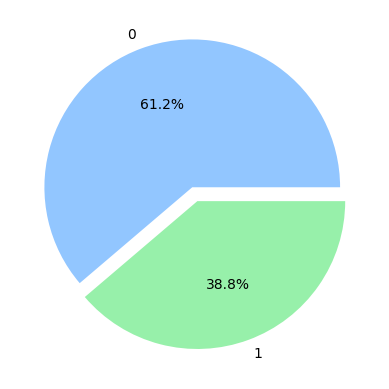

In [ ]:
check_data_balance(df["y_ksi"])

0    16607
1      881
Name: y_dth, dtype: int64

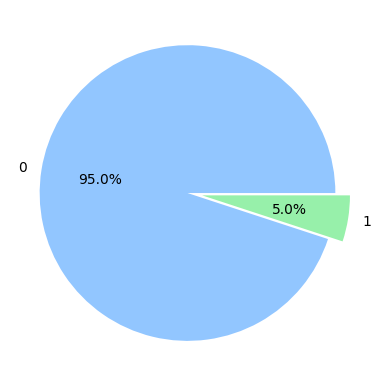

In [ ]:
check_data_balance(df["y_dth"])

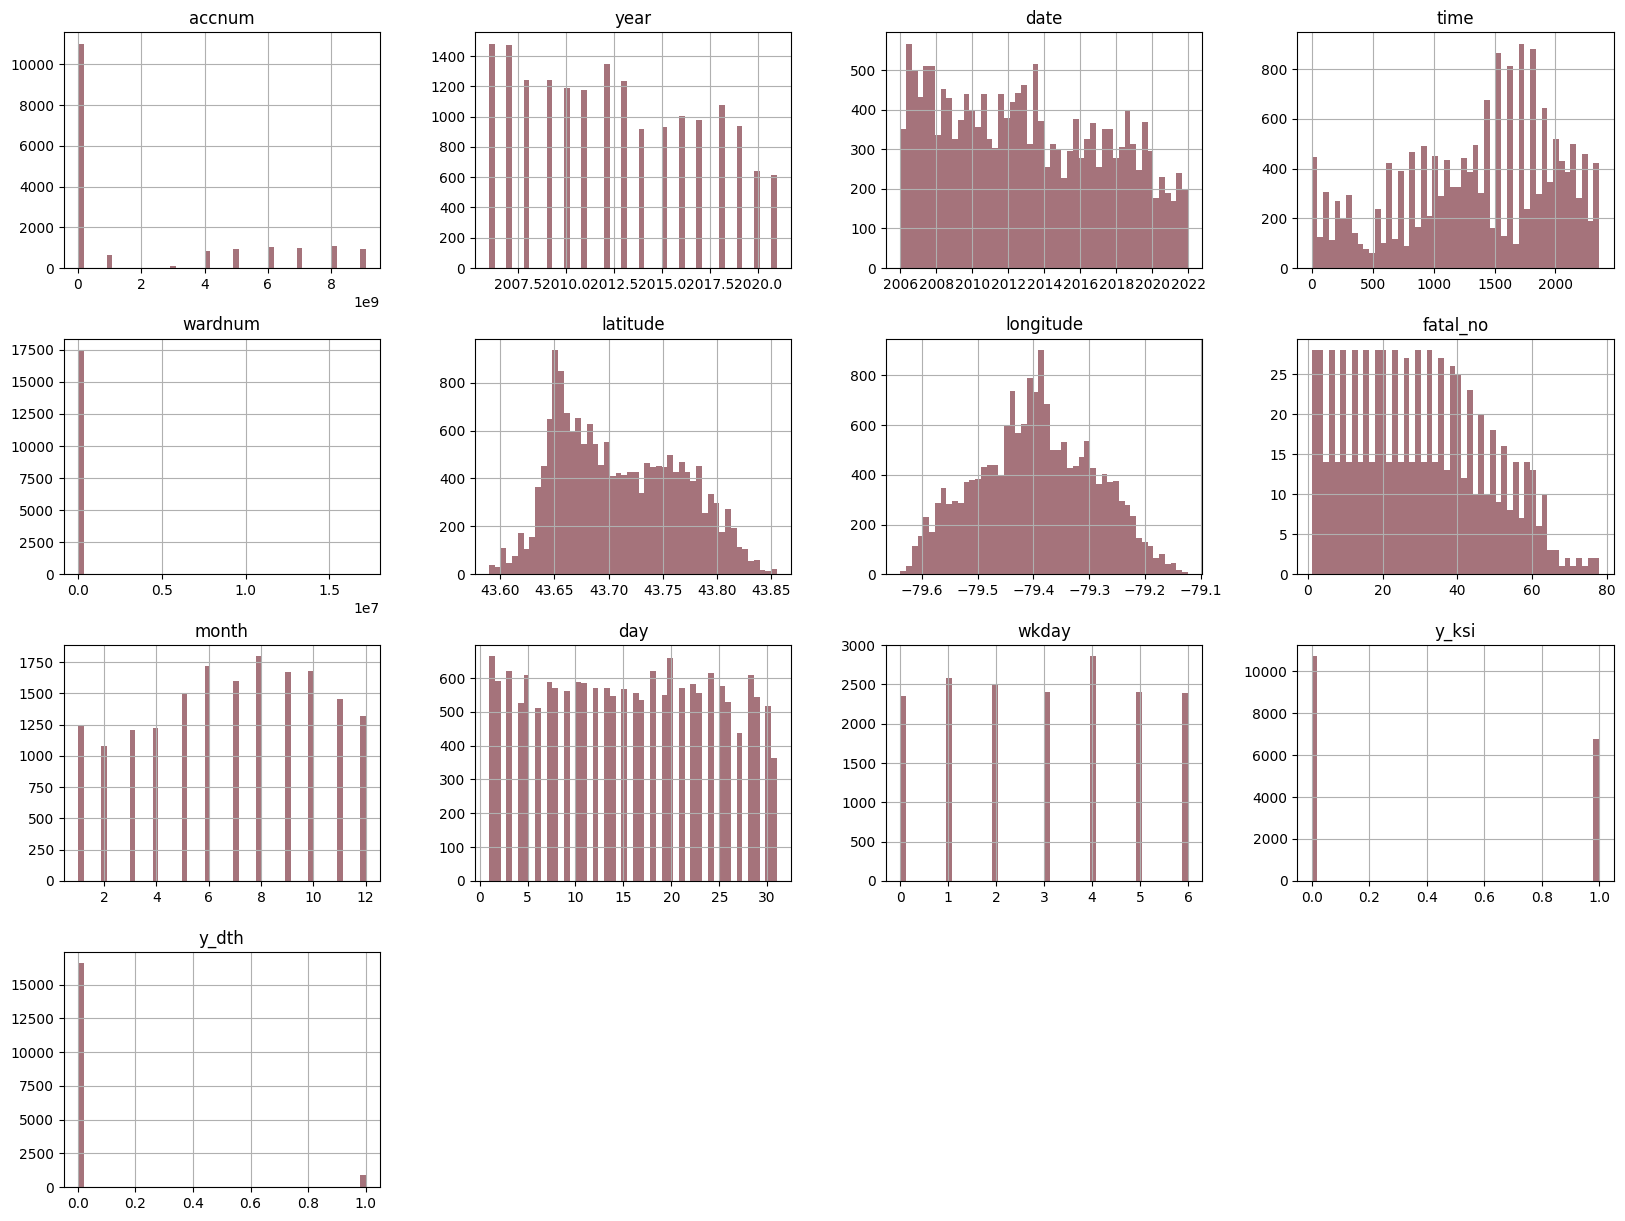

In [ ]:
# Viewing features
%matplotlib inline
import matplotlib.pyplot as plt
#draw histogram of each feature
df.hist(bins=50, figsize=(20,15), color = "#A5737B")
#save_fig("attribute_histogram_plots")
plt.show()

<Axes: >

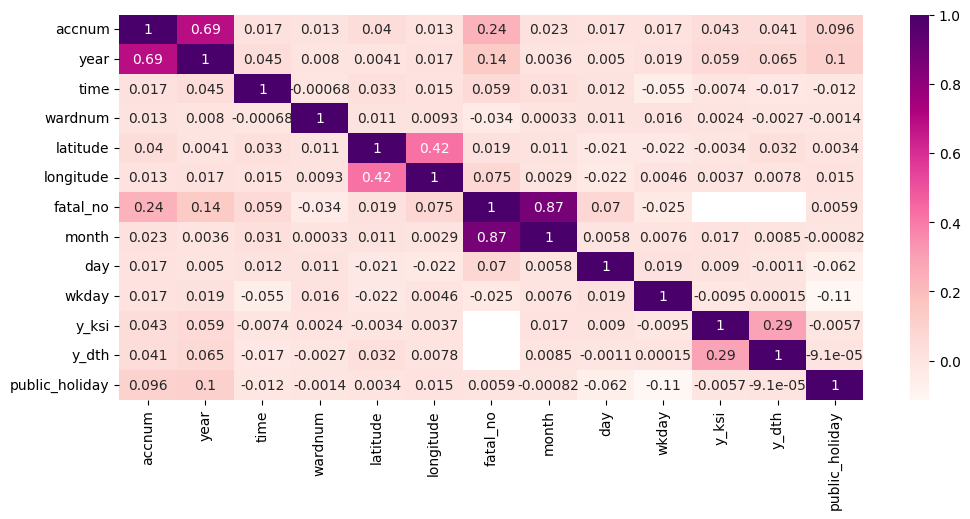

In [ ]:
# Correlation heatmap
plt.subplots(figsize=(12,5))
gender_correlation=df.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')

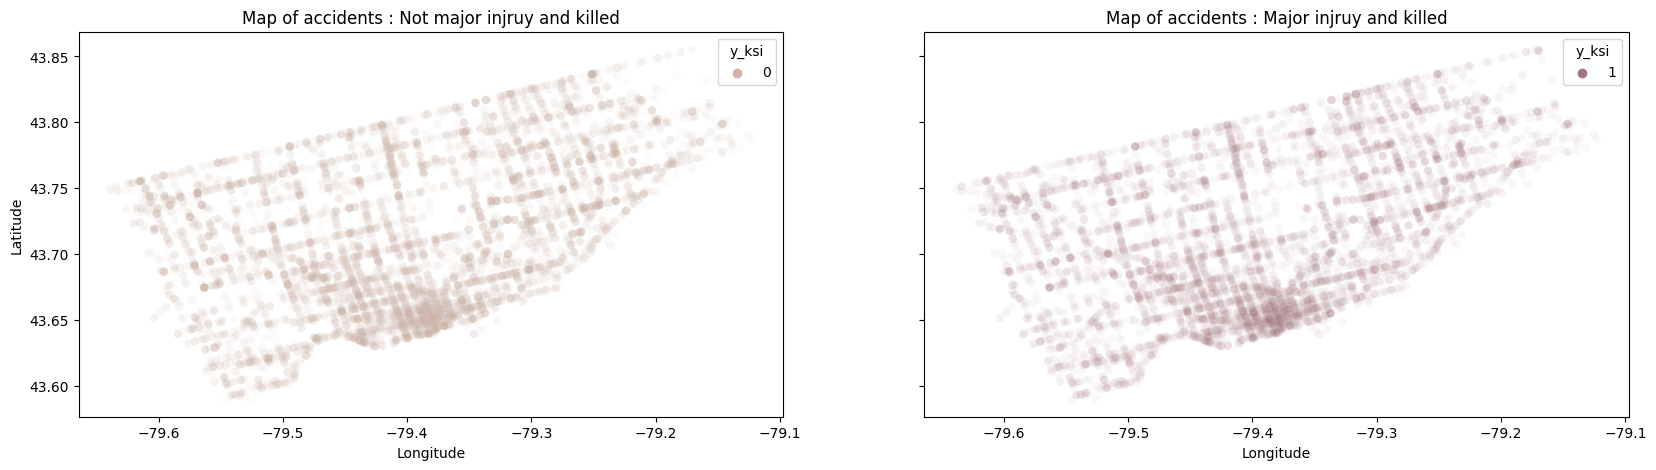

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))

(sns.scatterplot(data=df[df.y_ksi == 0], x="longitude", y="latitude", hue = 'y_ksi', alpha=0.05, palette=['#D0B4A6'],  ax=ax1)
  .set(title = 'Map of accidents : Not major injruy and killed', ylabel = 'Latitude', xlabel = 'Longitude'))

(sns.scatterplot(data=df[df.y_ksi == 1], x="longitude", y="latitude", hue = 'y_ksi', alpha=0.05, palette=["#A5737B"],  ax=ax2)
  .set(title = 'Map of accidents : Major injruy and killed', ylabel = 'Latitude', xlabel = 'Longitude'))

fig.show()

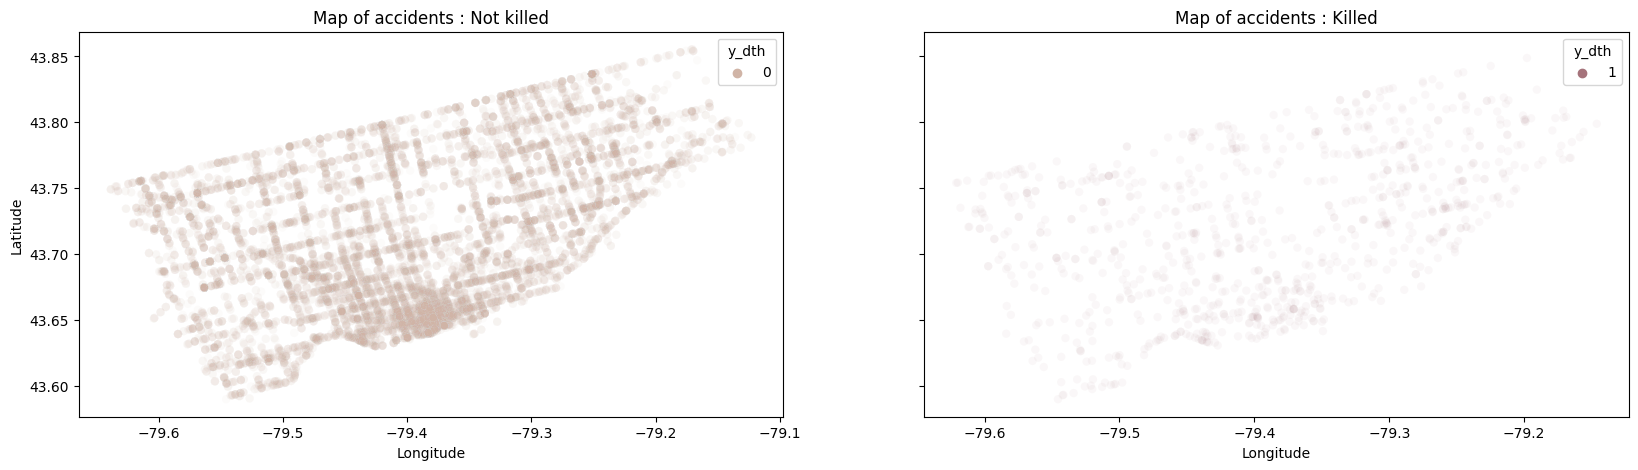

In [ ]:
# Map
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 5))

(sns.scatterplot(data=df[df.y_dth == 0], x="longitude", y="latitude", hue = 'y_dth', alpha=0.05, palette=['#D0B4A6'],  ax=ax1)
  .set(title = 'Map of accidents : Not killed', ylabel = 'Latitude', xlabel = 'Longitude'))

(sns.scatterplot(data=df[df.y_dth == 1], x="longitude", y="latitude", hue = 'y_dth', alpha=0.05, palette=['#A5737B'],  ax=ax2)
  .set(title = 'Map of accidents : Killed', ylabel = 'Latitude', xlabel = 'Longitude'))

fig.show()

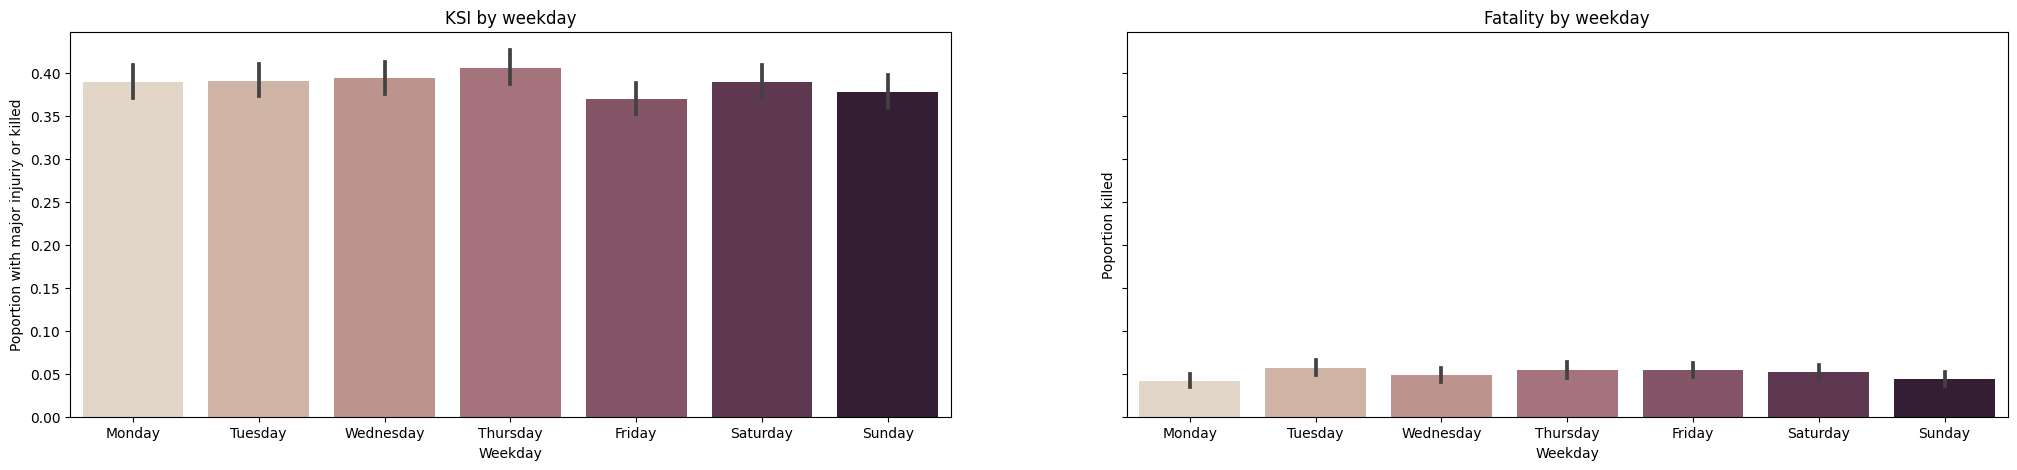

In [ ]:
# Days of the week
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(25, 5))
(sns.barplot(data=df, x="wkday_cat", y="y_ksi", palette="ch:.25", 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=ax1)
  .set(title = 'KSI by weekday', ylabel = 'Poportion with major injuriy or killed', xlabel = 'Weekday'))

(sns.barplot(data=df, x="wkday_cat", y="y_dth", palette="ch:.25", 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=ax2)
  .set(title = 'Fatality by weekday',  ylabel = 'Poportion killed', xlabel = 'Weekday'))
fig.show()

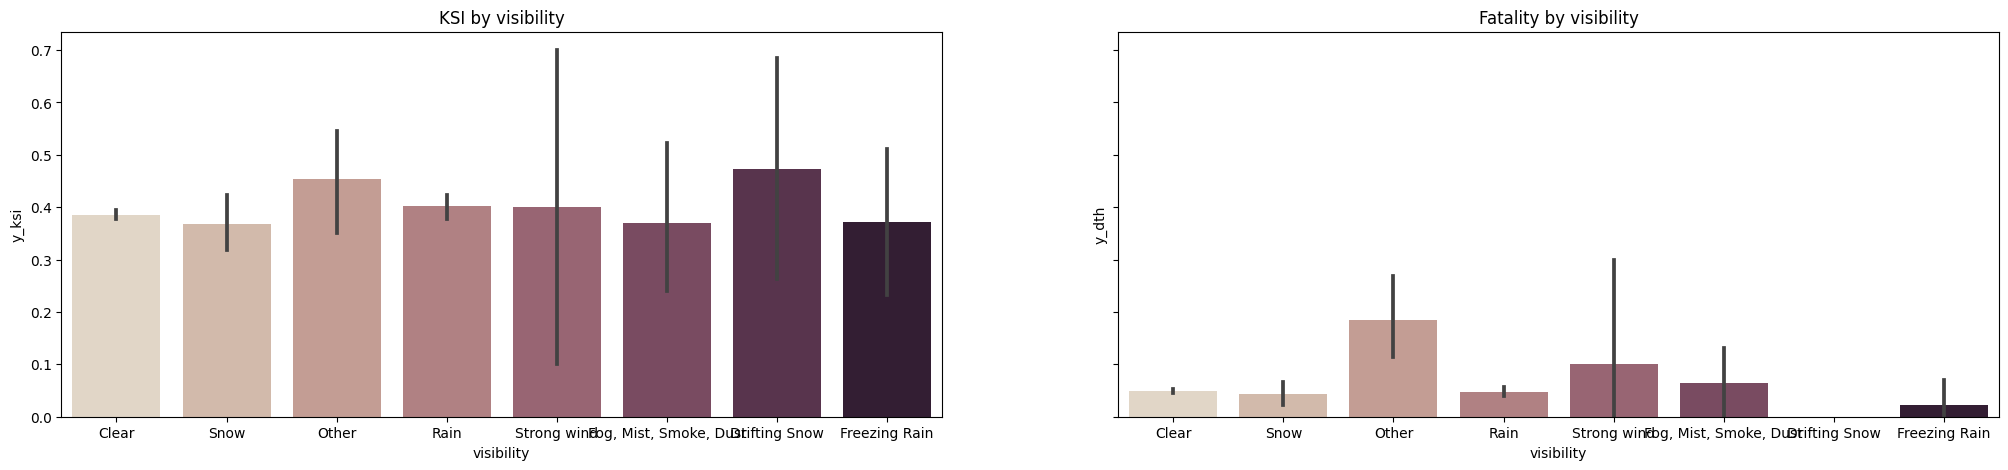

In [ ]:
# Visibility 
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(25, 5))
sns.barplot(data=df, x="visibility", y="y_ksi", palette="ch:.25", ax=ax1).set(title = 'KSI by visibility')
sns.barplot(data=df, x="visibility", y="y_dth", palette="ch:.25", ax=ax2).set(title = 'Fatality by visibility')
fig.show()

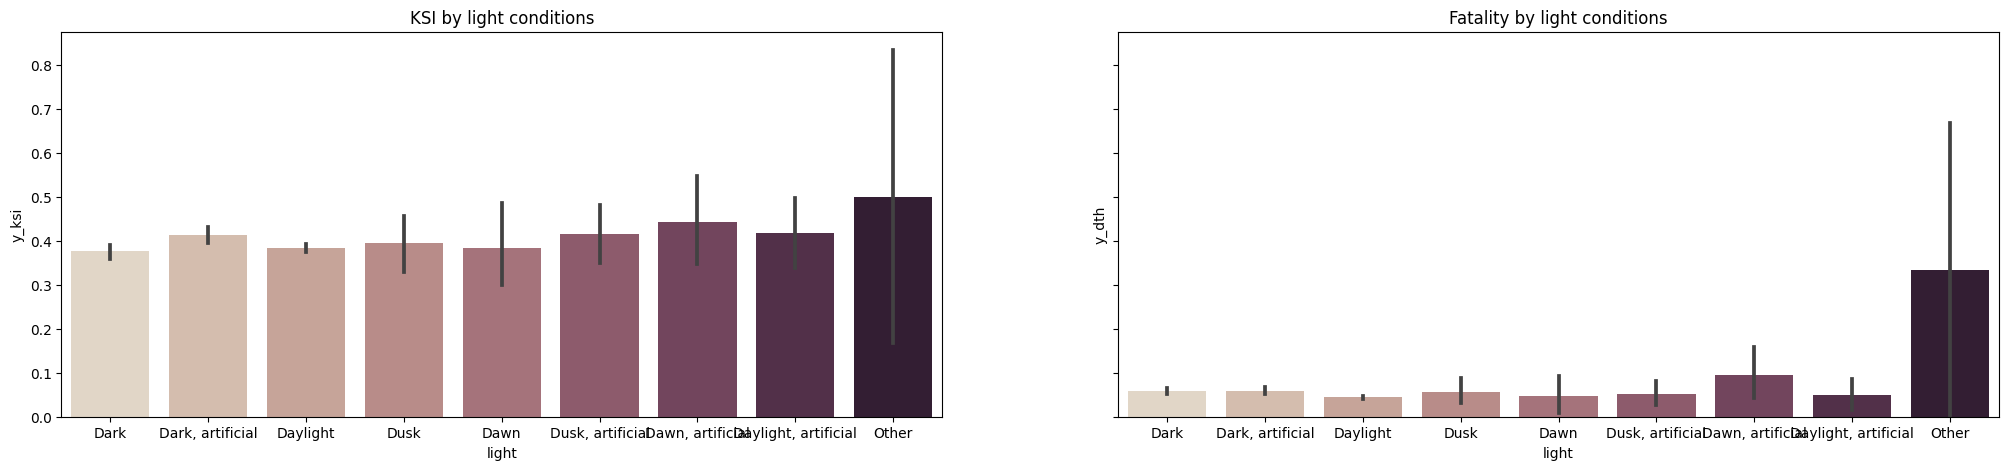

In [ ]:
# Light 
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(25, 5))
sns.barplot(data=df, x="light", y="y_ksi", palette="ch:.25", ax=ax1).set(title = 'KSI by light conditions')
sns.barplot(data=df, x="light", y="y_dth", palette="ch:.25", ax=ax2).set(title = 'Fatality by light conditions')
fig.show()

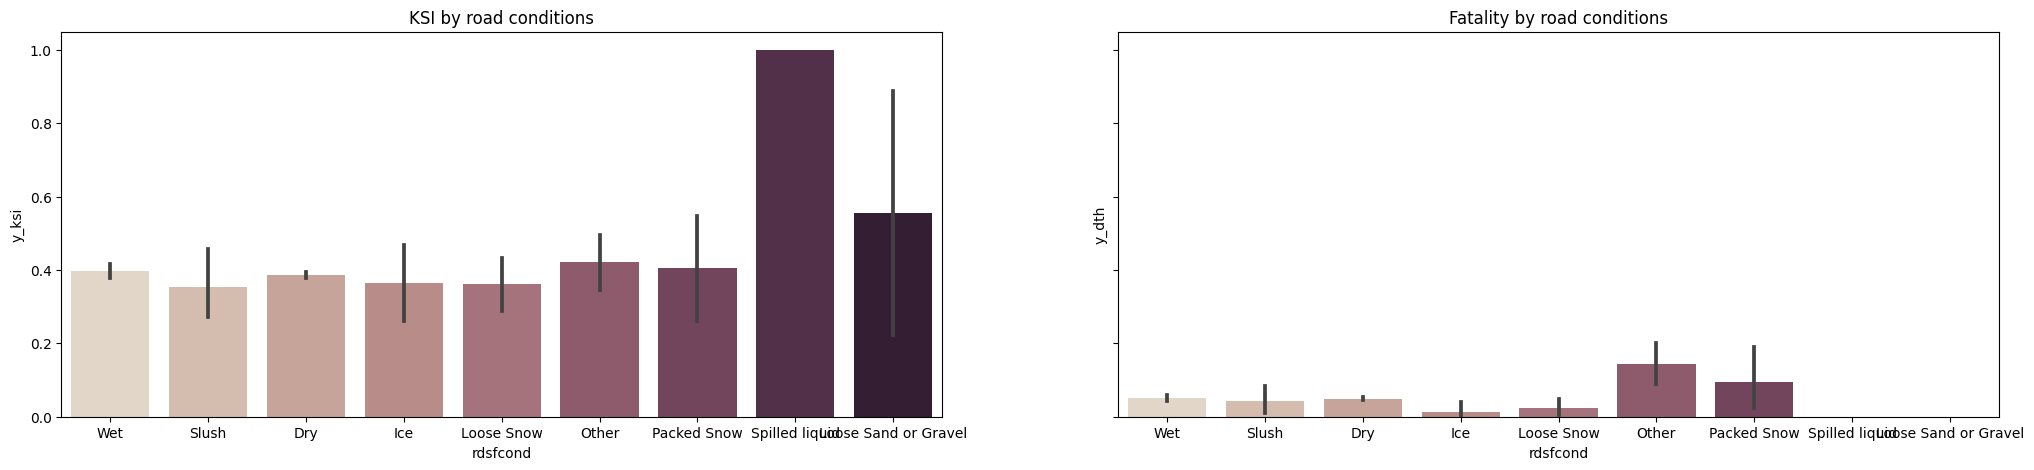

In [ ]:
# Road conditions 
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(25, 5))
sns.barplot(data=df, x="rdsfcond", y="y_ksi", palette="ch:.25", ax=ax1).set(title = 'KSI by road conditions')
sns.barplot(data=df, x="rdsfcond", y="y_dth", palette="ch:.25", ax=ax2).set(title = 'Fatality by road conditions')
fig.show()

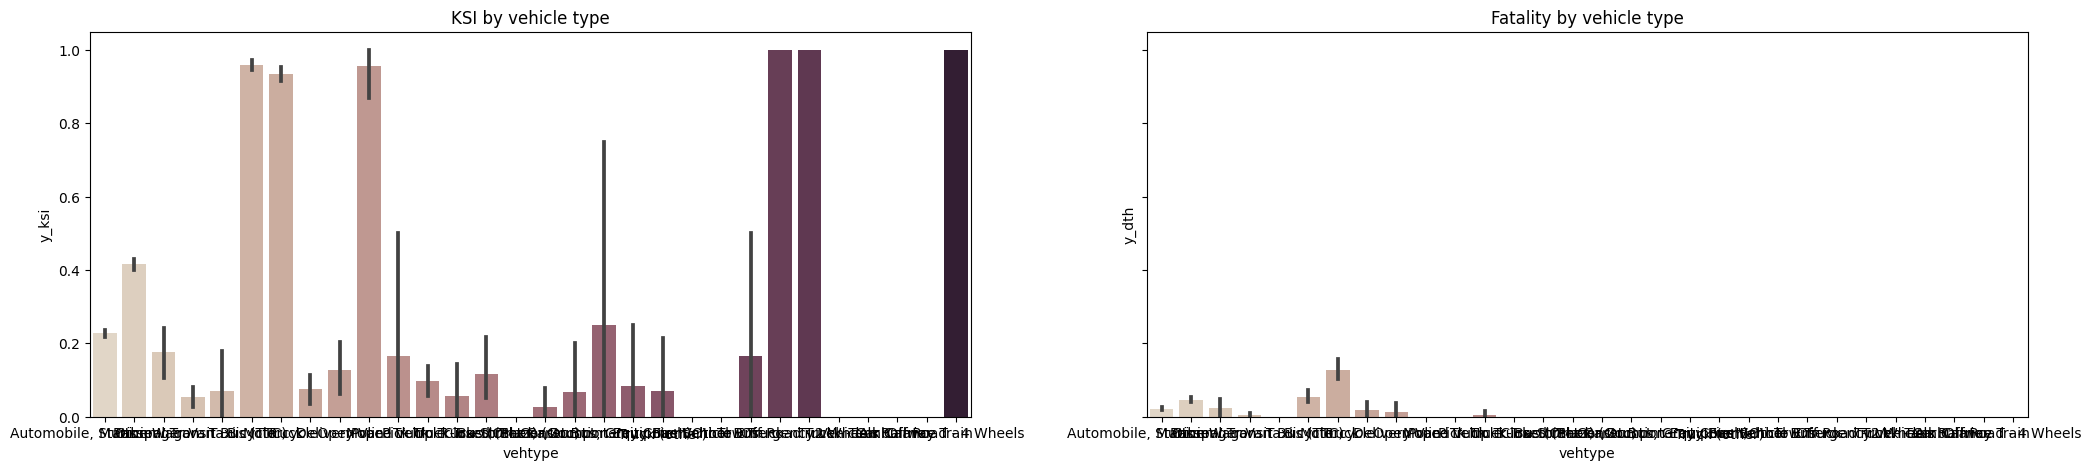

In [ ]:
# Vehicle type 
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(25, 5))
sns.barplot(data=df, x="vehtype", y="y_ksi", palette="ch:.25", ax=ax1).set(title = 'KSI by vehicle type')
sns.barplot(data=df, x="vehtype", y="y_dth", palette="ch:.25", ax=ax2).set(title = 'Fatality by vehicle type')
fig.show()
#df['vehtype'].value_counts()

## Grouped dataset

In [ ]:
# Creating binary crash level fatality variable
outcome = df.loc[df['injury'] == "Fatal"]
outcome = outcome[['accnum', 'year', 'wkday_cat', 'injury', 'y_dth']]
outcome = outcome.groupby(['accnum', 'year', 'wkday_cat'], as_index = False).first()

# Grouping by accnum, year and weekday
dfg = df.groupby(['accnum', 'year', 'wkday_cat'], as_index = False).first()

# Adding binary crash-level fatility variable
dfg['y'] = dfg['accnum'].isin(outcome['accnum'])
dfg['y'] = np.where((dfg['y'] == True), 1, 0)

# Adding hour variable
dfg['hour'] =  df['time'].astype(str).str[:-2]
dfg['hour'] =  np.where((dfg['hour'] == ''), '0', dfg['hour'])


# Fixing holiday to binary 
dfg['public_holiday'] = np.where((dfg['public_holiday'] == True), 1, 0)


# Filter year 
dfg = dfg.query("year >= 2014")


# Removing un-needed columns for ML
dfg = dfg.drop(columns=[ 'acclass', 'wardnum', 'street1', 'street2', 'hood_140', 'neighbourhood_140', 'division', 'neighbourhood_158', 'district',
    'year', 'date', 'injury','accloc', 'invtype', 'invage', 'time',
    'injury', 'fatal_no', 'initdir', 'vehtype', 'manoeuver', 'drivact',
    'drivcond', 'pedtype', 'pedact', 'pedcond', 'wkday', 'y_ksi', 
    'y_dth', 'accnum', 'offset', 'longitude', 'latitude']) 

dfg.head()

,wkday_cat,road_class,loccoord,traffctl,visibility,light,rdsfcond,impactype,pedestrian,cyclist,...,ag_driv,redlight,alcohol,disability,hood_158,month,day,public_holiday,y,hour
0,Saturday,Major Arterial,Intersection,Traffic Signal,Rain,Dark,Wet,Pedestrian Collisions,Yes,No,...,No,No,No,No,56,1,4,0,0,2
1,Saturday,Major Arterial,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Pedestrian Collisions,Yes,No,...,No,No,No,No,168,1,4,0,1,2
2,Monday,Minor Arterial,Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Pedestrian Collisions,Yes,No,...,Yes,No,No,No,84,1,6,0,0,20
3,Tuesday,Major Arterial,Intersection,Traffic Signal,Clear,Dark,Dry,Turning Movement,No,No,...,Yes,No,No,No,120,1,7,0,0,2
4,Thursday,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Angle,No,No,...,Yes,Yes,No,No,1,1,9,0,0,2


In [ ]:
dfg.columns

Index(['wkday_cat', 'road_class', 'loccoord', 'traffctl', 'visibility',
       'light', 'rdsfcond', 'impactype', 'pedestrian', 'cyclist', 'automobile',
       'motorcycle', 'truck', 'trsn_city_veh', 'emerg_veh', 'passenger',
       'speeding', 'ag_driv', 'redlight', 'alcohol', 'disability', 'hood_158',
       'month', 'day', 'public_holiday', 'y', 'hour'],
      dtype='object')

0    2310
1     481
Name: y, dtype: int64

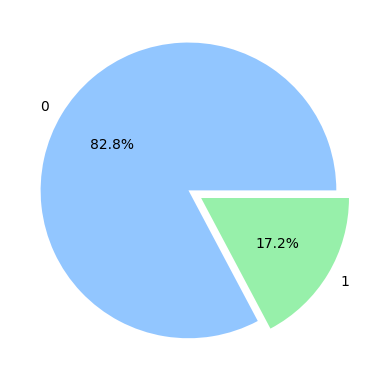

In [ ]:
# Check outcome balance
check_data_balance(dfg["y"]) # We have an unbalanced dataset

In [ ]:
dfg.describe()

,month,day,public_holiday,y
count,2791.000000,2791.000000,2791.000000,2791.000000
mean,6.867789,15.797564,0.022214,0.172340
std,3.277063,8.868345,0.147406,0.377743
min,1.000000,1.000000,0.000000,0.000000
25%,4.000000,8.000000,0.000000,0.000000
50%,7.000000,16.000000,0.000000,0.000000
75%,10.000000,23.000000,0.000000,0.000000
max,12.000000,31.000000,1.000000,1.000000


In [ ]:
dfg.describe(include = object)

,wkday_cat,road_class,loccoord,traffctl,visibility,light,rdsfcond,impactype,pedestrian,cyclist,...,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol,disability,hood_158,hour
count,2791,2751,2788,2789,2782,2791,2781,2790,2791,2791,...,2791,2791,2791,2791,2791,2791,2791,2791,2791,2791
unique,7,9,4,7,8,9,8,10,2,2,...,2,2,2,2,2,2,2,2,159,24
top,Friday,Major Arterial,Intersection,No Control,Clear,Daylight,Dry,Pedestrian Collisions,No,No,...,No,No,No,No,Yes,No,No,No,1,17
freq,441,1927,1846,1381,2439,1524,2267,1189,1552,2451,...,2631,2781,2000,2380,1407,2628,2698,2725,80,202


In [ ]:
dfg.dtypes

wkday_cat         object
road_class        object
loccoord          object
traffctl          object
visibility        object
light             object
rdsfcond          object
impactype         object
pedestrian        object
cyclist           object
automobile        object
motorcycle        object
truck             object
trsn_city_veh     object
emerg_veh         object
passenger         object
speeding          object
ag_driv           object
redlight          object
alcohol           object
disability        object
hood_158          object
month              int64
day                int64
public_holiday     int64
y                  int64
hour              object
dtype: object

In [ ]:
dfg.isna().sum().sort_values()

wkday_cat          0
public_holiday     0
day                0
month              0
hood_158           0
disability         0
alcohol            0
redlight           0
ag_driv            0
speeding           0
passenger          0
emerg_veh          0
y                  0
trsn_city_veh      0
motorcycle         0
automobile         0
cyclist            0
pedestrian         0
light              0
truck              0
hour               0
impactype          1
traffctl           2
loccoord           3
visibility         9
rdsfcond          10
road_class        40
dtype: int64

### Data vis

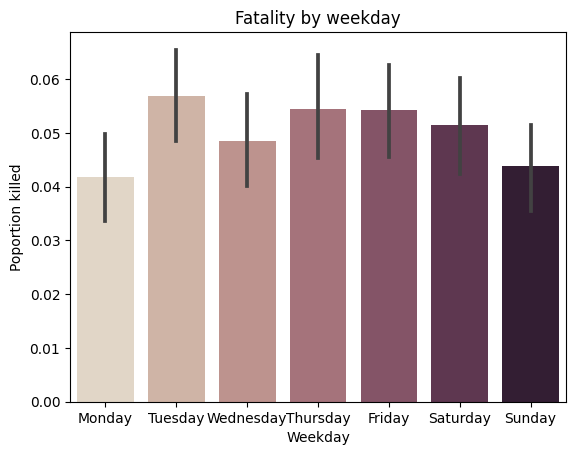

In [ ]:
# Days of the week
(sns.barplot(data=df, x="wkday_cat", y="y_dth", palette="ch:.25", 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
  .set(title = 'Fatality by weekday',  ylabel = 'Poportion killed', xlabel = 'Weekday'))
fig.show()

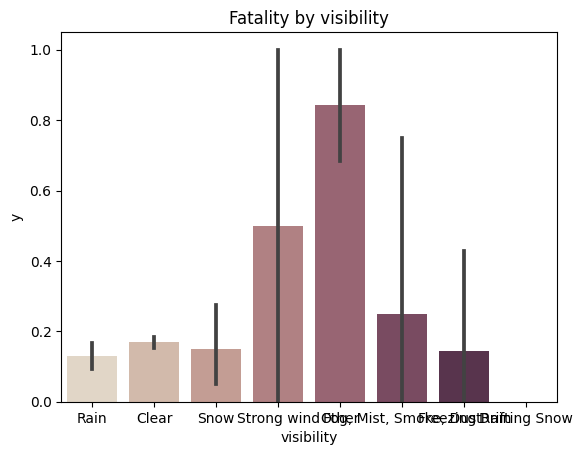

In [ ]:
# Visibility 
sns.barplot(data=dfg, x="visibility", y="y", palette="ch:.25").set(title = 'Fatality by visibility')
fig.show()

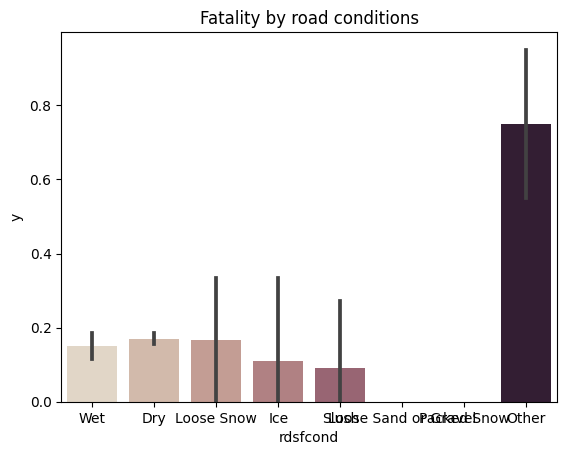

In [ ]:
# Road conditions 
sns.barplot(data=dfg, x="rdsfcond", y="y", palette="ch:.25").set(title = 'Fatality by road conditions')
fig.show()

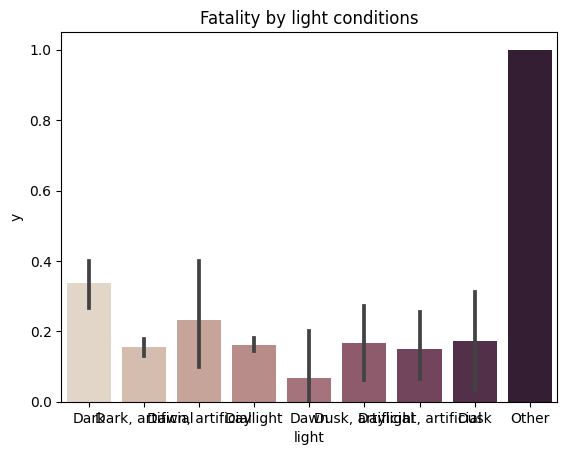

In [ ]:
# Light
sns.barplot(data=dfg, x="light", y="y", palette="ch:.25").set(title = 'Fatality by light conditions')
fig.show()

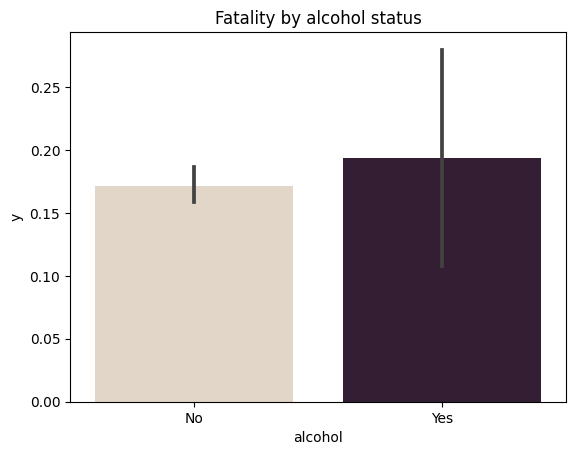

In [ ]:
# Alcohol
sns.barplot(data=dfg, x="alcohol", y="y", palette="ch:.25").set(title = 'Fatality by alcohol status')
fig.show()

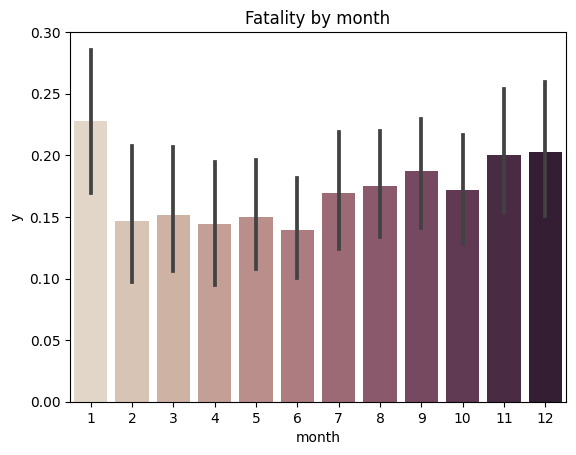

In [ ]:
# Alcohol
sns.barplot(data=dfg, x="month", y="y", palette="ch:.25").set(title = 'Fatality by month')
fig.show()

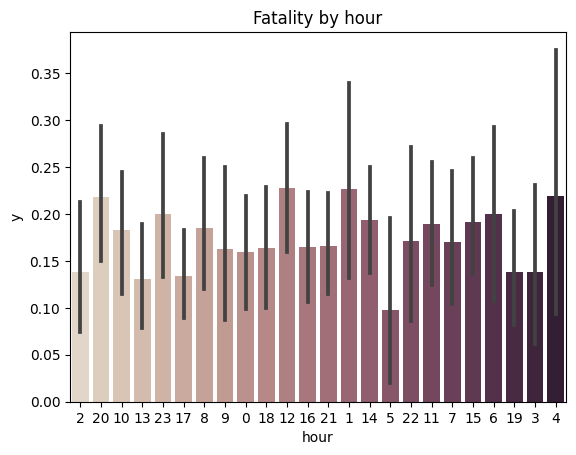

In [ ]:
# Hour
sns.barplot(data=dfg, x="hour", y="y", palette="ch:.25").set(title = 'Fatality by hour')
fig.show()

In [ ]:
dfg.y

0       0
1       1
2       0
3       0
4       0
       ..
6258    0
6259    0
6260    0
6261    0
6262    0
Name: y, Length: 2791, dtype: int64

# Machine Learning

In [ ]:
# We can move these to appropriate chunks after
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.plotting import plot_learning_curves

In [ ]:
# Train test split for KSI y variable
from sklearn.model_selection import train_test_split

X = dfg.drop(columns=['y'])
# X = X[["hour", "road_class" , "traffctl", "visibility", "light", "rdsfcond"]]
y = dfg['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1953, 26), (838, 26), (1953,), (838,))

In [ ]:
X_train.head()

,wkday_cat,road_class,loccoord,traffctl,visibility,light,rdsfcond,impactype,pedestrian,cyclist,...,speeding,ag_driv,redlight,alcohol,disability,hood_158,month,day,public_holiday,hour
3615,Sunday,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Cyclist Collisions,No,Yes,...,No,No,No,No,No,78,9,20,0,9
5982,Thursday,Collector,Intersection,Stop Sign,Clear,Daylight,Dry,Pedestrian Collisions,Yes,No,...,No,No,No,No,No,168,4,18,0,4
4087,Friday,Major Arterial,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Yes,No,...,No,Yes,No,No,No,165,3,14,0,16
6078,Thursday,Major Arterial,Mid-Block,Stop Sign,Clear,Daylight,Dry,Turning Movement,No,No,...,No,Yes,No,No,No,38,7,25,0,7
3707,Thursday,Minor Arterial,Mid-Block,No Control,Clear,Daylight,Dry,Pedestrian Collisions,Yes,No,...,No,No,No,No,No,88,7,10,0,16


In [ ]:
X_train.columns

Index(['wkday_cat', 'road_class', 'loccoord', 'traffctl', 'visibility',
       'light', 'rdsfcond', 'impactype', 'pedestrian', 'cyclist', 'automobile',
       'motorcycle', 'truck', 'trsn_city_veh', 'emerg_veh', 'passenger',
       'speeding', 'ag_driv', 'redlight', 'alcohol', 'disability', 'hood_158',
       'month', 'day', 'public_holiday', 'hour'],
      dtype='object')

## Main Pipeline

# Model Training


In [ ]:
# Setting threshold for evaluation metrics
threshold = 0.25 # Set to False if wanting to use no threshold

## Logistic

In [ ]:
# Column types 
numeric_features = []#['wardnum'] #, 'latitude', 'longitude']
categorical_features = [item for item in X_train.columns.values if item not in numeric_features]

# Build a numeric pipeline
numeric_transformer = make_pipeline(   
    KNNImputer(),
    StandardScaler())

# Build a categorical pipeline
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# Build a column transformer
col_transformer = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features)
)


# Feature selction
from sklearn.feature_selection import SelectPercentile, chi2
selection = SelectPercentile(chi2, percentile = 50)

# Main pipeline
main_pipe = Pipeline(
            steps=[("ct", col_transformer),
                   ('sel', selection),
                   ("log", LogisticRegression())]
)

# Build a grid of the parameters you wish to search. 
param_grid = {
    "log__penalty" : ["none", "l1", "l2", "elasticnet"],
    "log__C" : [100, 10, 1.0, 0.1, 0.01]
}

# Conduct grid search with 10 fold cross-validation
log = GridSearchCV(main_pipe, param_grid, cv=10, verbose=1, n_jobs=-1)

# Fit your pipeline with grid search 
log.fit(X_train, y_train)

# Save the best hyperparameter values in an object named best_hyperparams
best_hyperparams = log.best_params_

# Print best_hyperparams
print(best_hyperparams)

# Save your results in an object named `train_score`
train_score = log.score(X_train, y_train)

# Display your score 
train_score

# Best model
log_best = log.best_estimator_
log_best.score(X_train, y_train), log_best.score(X_test, y_test)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'log__C': 0.1, 'log__penalty': 'l2'}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

(0.8412698412698413, 0.8138424821002387)

In [ ]:
# Determine threshold to use
# threshold = False # Set to False if wanting to use no threshold

if type(threshold)==bool :
  y_pred_train = log.predict_proba(X_train)[:,1]
  y_pred_test =  log.predict_proba(X_test)[:,1]
else : 
  y_pred_train = (log.predict_proba(X_train)[:,1] >= threshold).astype(int)
  y_pred_test =  (log.predict_proba(X_test)[:,1] >= threshold).astype(int)

In [ ]:
# Creating AUC
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(y_train, y_pred_train) 
auc_test = roc_auc_score(y_test, y_pred_test)

auc_train, auc_test

(0.6658747320881812, 0.5820114315072892)

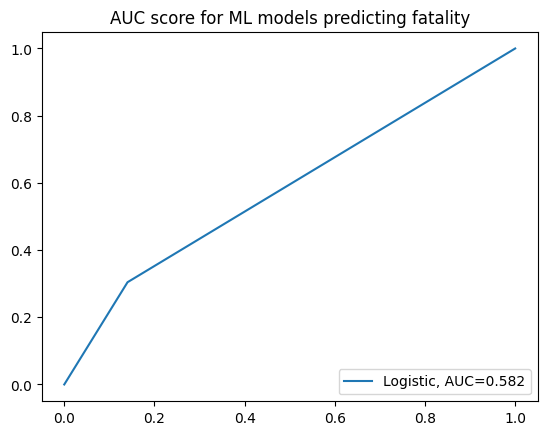

In [ ]:
# AUC curve
from sklearn.metrics import roc_curve

# https://www.statology.org/plot-multiple-roc-curves-python/

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
auc = round(roc_auc_score(y_test, y_pred_test), 4)
plt.plot(fpr, tpr, label="Logistic, AUC="+str(auc))
plt.title("AUC score for ML models predicting fatality")
plt.legend(loc='lower right')

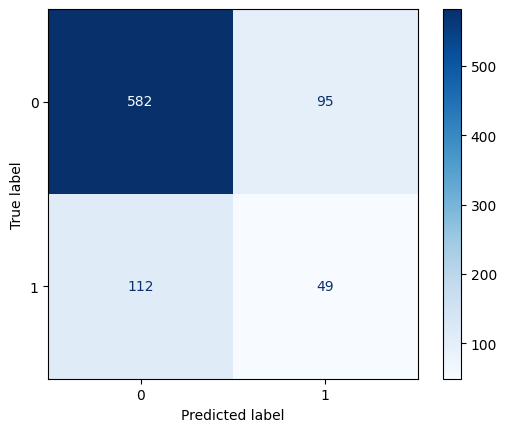

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if type(threshold)==bool :
  predictions = log.predict(X_test)
else : 
  predictions = (log.predict_proba(X_test)[:,1] >= 0.25).astype(int)

cm = confusion_matrix(y_test, predictions, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Printing metrics
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, labels=[1,2], average='micro')

from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions, labels=[1,2], average='micro')

from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions, labels=[1,2], average='micro')


print("Logistic Regression ------------------------------------------")
print('Recall: ', round(recall, 3), ', Percision: ', round(precision, 3), ', F1: ', round(f1, 3)) 
print("\n\n")

# Calculate classification report
from sklearn.metrics import classification_report
print("Logistic Regression ------------------------------------------")
print(classification_report(y_test, predictions,
                            target_names=["Non-Fatal", "Fatal"]))

Logistic Regression ------------------------------------------
Recall:  0.304 , Percision:  0.34 , F1:  0.321



Logistic Regression ------------------------------------------
              precision    recall  f1-score   support

   Non-Fatal       0.84      0.86      0.85       677
       Fatal       0.34      0.30      0.32       161

    accuracy                           0.75       838
   macro avg       0.59      0.58      0.59       838
weighted avg       0.74      0.75      0.75       838



## Learning Curve for Logistic Regression

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

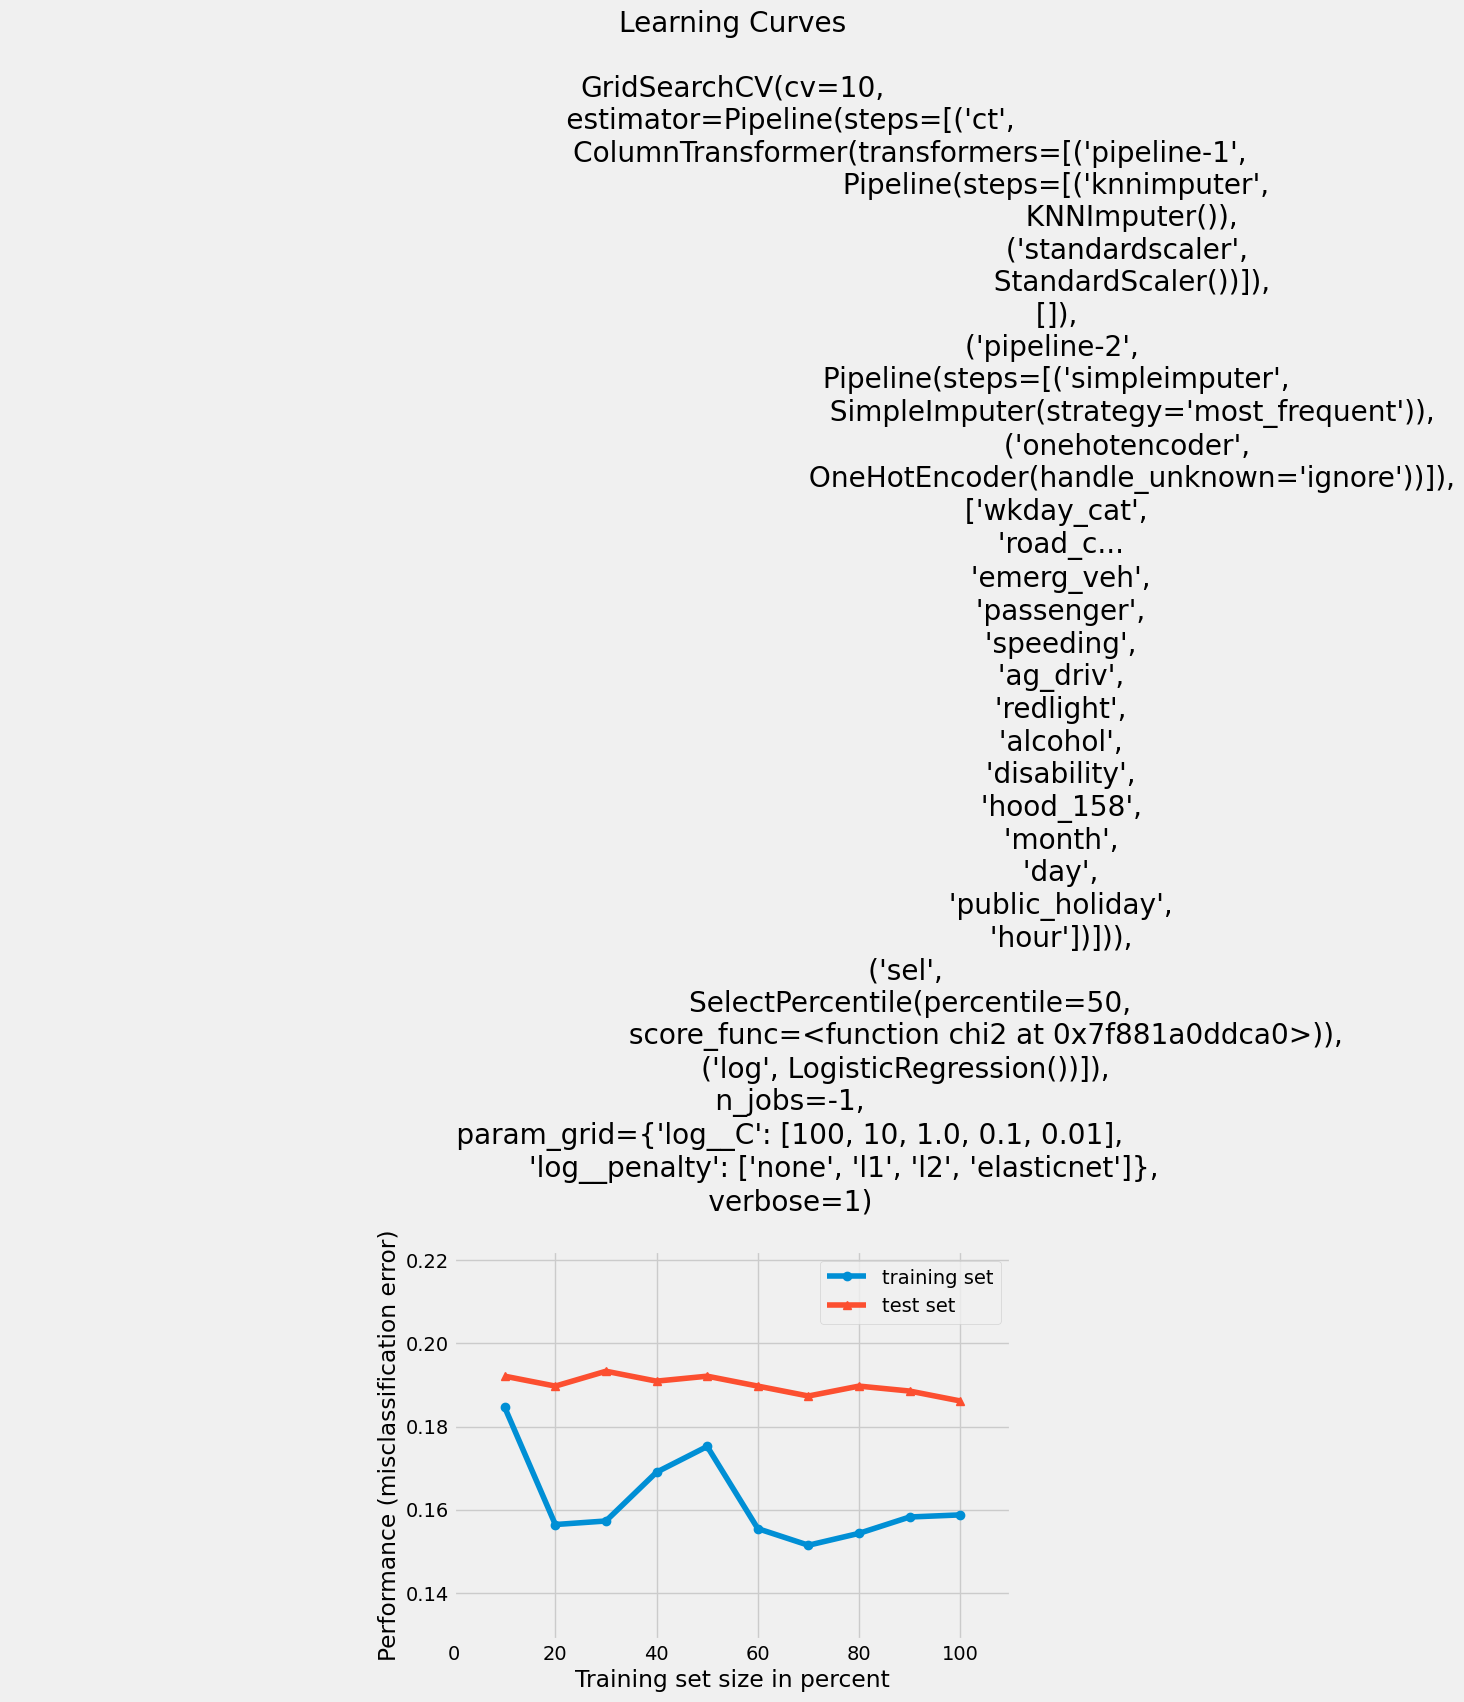

In [ ]:
# Learning curve
plot_learning_curves(X_train, y_train, X_test, y_test, log)
plt.show()

## KNN

In [ ]:
# Column types 
numeric_features = []#['wardnum']#, 'latitude', 'longitude']
categorical_features = [item for item in X_train.columns.values if item not in numeric_features]


# Build a numeric pipeline
numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

# Build a categorical pipeline
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# Build a column transformer
col_transformer = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features))

main_pipe = Pipeline(
            steps=[("ct", col_transformer),
                   ("knn", KNeighborsClassifier())])


# Build a grid of the parameters you wish to search. 
param_grid = {
    "knn__n_neighbors" : [3, 5, 7, 9, 11, 13, 15, 17, 19],
    "knn__weights" : ['uniform', 'distance']
}

# Conduct grid search with 10 fold cross-validation
knn = GridSearchCV(main_pipe, param_grid, cv=10, verbose=1, n_jobs=-1)

# Fit your pipeline with grid search 
knn.fit(X_train, y_train)

# Save the best hyperparameter values in an object named best_hyperparams
best_hyperparams = knn.best_params_

# Print best_hyperparams
print(best_hyperparams)

# Save your results 
train_score = knn.score(X_train, y_train)

# Display your score 
train_score # I dont think we can use this since the dataset is unbalanced

Fitting 10 folds for each of 18 candidates, totalling 180 fits
{'knn__n_neighbors': 15, 'knn__weights': 'uniform'}


0.8428059395801332

In [ ]:
# Determine threshold to use
# threshold = 0.25 # Set to False if wanting to use no threshold

if type(threshold)==bool :
  y_pred_train = knn.predict_proba(X_train)[:,1]
  y_pred_test =  knn.predict_proba(X_test)[:,1]
else : 
  y_pred_train = (knn.predict_proba(X_train)[:,1] >= threshold).astype(int)
  y_pred_test =  (knn.predict_proba(X_test)[:,1] >= threshold).astype(int)

In [ ]:
# Creating AUC score
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(y_train, y_pred_train) 
auc_test = roc_auc_score(y_test, y_pred_test)

auc_train, auc_test

(0.6605404164115125, 0.5931631145811352)

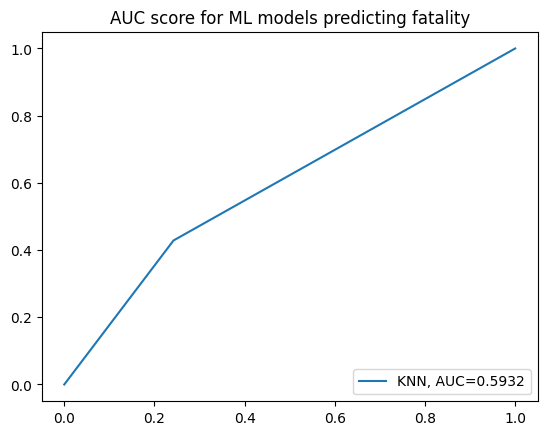

In [ ]:
# AUC curve
from sklearn.metrics import roc_curve

# https://www.statology.org/plot-multiple-roc-curves-python/

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
auc = round(roc_auc_score(y_test, y_pred_test), 4)
plt.plot(fpr, tpr, label="KNN, AUC="+str(auc))
plt.title("AUC score for ML models predicting fatality")
plt.legend(loc='lower right')

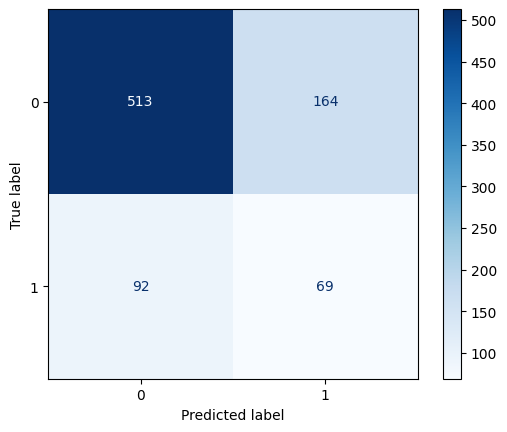

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if type(threshold)==bool :
  predictions = knn.predict(X_test)
else : 
  predictions = (knn.predict_proba(X_test)[:,1] >= 0.25).astype(int)

cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Printing metrics
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, labels=[1,2], average='micro')

from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions, labels=[1,2], average='micro')

from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions, labels=[1,2], average='micro')


print("K-Nearest Neighbours ------------------------------------------")
print('Recall: ', round(recall, 3), ', Percision: ', round(precision, 3), ', F1: ', round(f1, 3)) 
print("\n\n")

# Calculate classification report
from sklearn.metrics import classification_report
print("K-Nearest Neighbours ------------------------------------------")
print(classification_report(y_test, predictions,
                            target_names=["Non-Fatal", "Fatal"]))

K-Nearest Neighbours ------------------------------------------
Recall:  0.429 , Percision:  0.296 , F1:  0.35



K-Nearest Neighbours ------------------------------------------
              precision    recall  f1-score   support

   Non-Fatal       0.85      0.76      0.80       677
       Fatal       0.30      0.43      0.35       161

    accuracy                           0.69       838
   macro avg       0.57      0.59      0.58       838
weighted avg       0.74      0.69      0.71       838



## Learning Curve for N-Nearest Neighbours

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits


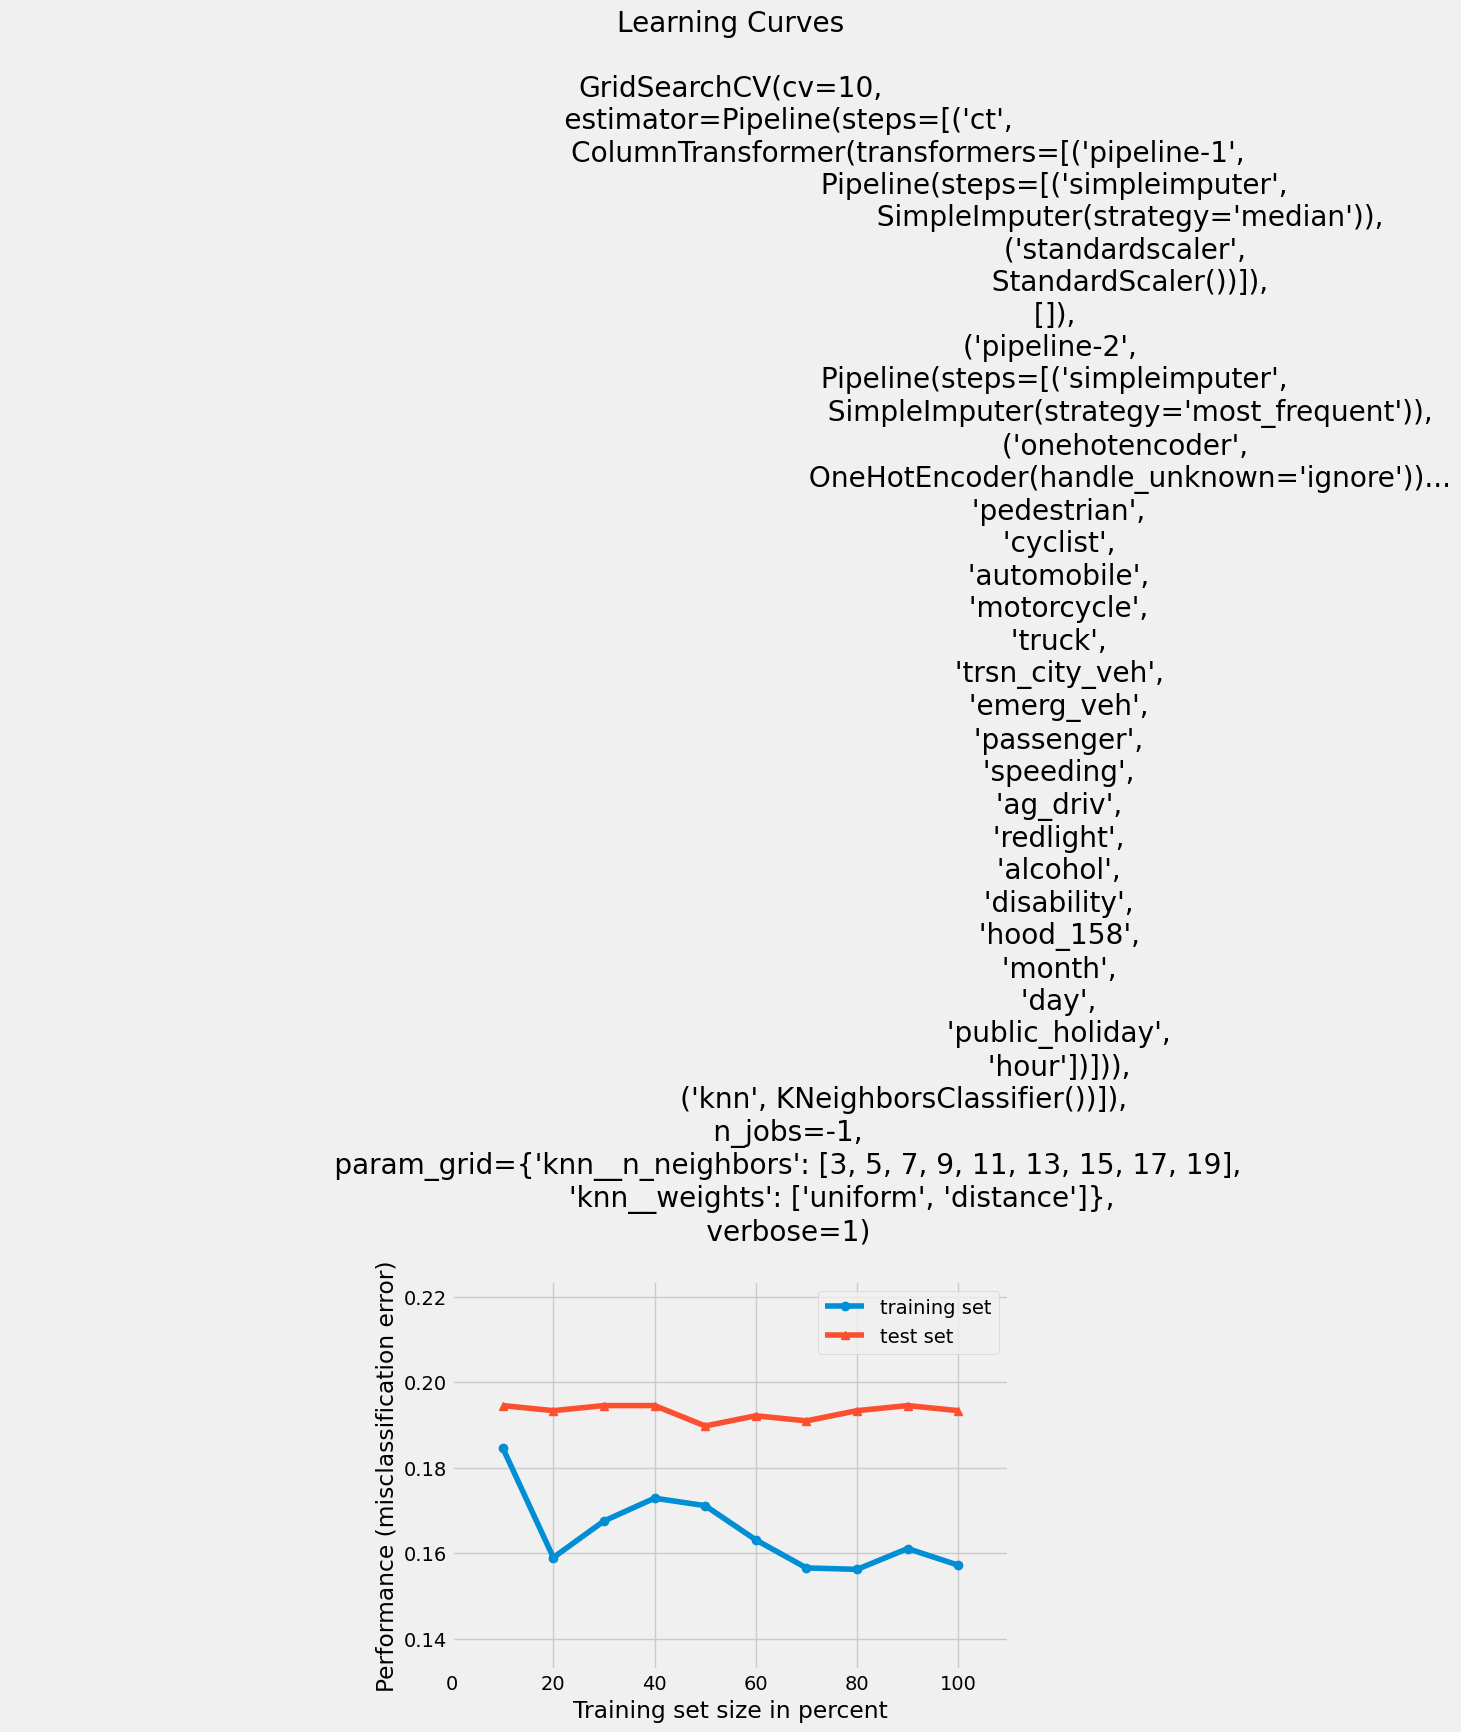

In [ ]:
# Learning curve
plot_learning_curves(X_train, y_train, X_test, y_test, knn)
plt.show()

## Decision Tree

In [ ]:
# Column types 
numeric_features = []#['wardnum']#, 'latitude', 'longitude']
categorical_features = [item for item in X_train.columns.values if item not in numeric_features]

# Build a numeric pipeline
numeric_transformer = make_pipeline(
    #SimpleImputer(strategy="median"),
    KNNImputer(),
    StandardScaler())

# Build a categorical pipeline
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# Build a column transformer
col_transformer = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features)
)


# Pipeline
main_pipe = make_pipeline(col_transformer, 
                          DecisionTreeClassifier())

# Build a grid of the parameters you wish to search. 
param_grid = {
    "columntransformer__pipeline-1__knnimputer__n_neighbors" : [3, 5, 7, 9],
    "decisiontreeclassifier__criterion" : ['gini', 'entropy'],
    "decisiontreeclassifier__max_depth" : [2,4,6,8,10,12]
}


# Conduct grid search with 10 fold cross-validation
tree = GridSearchCV(main_pipe, param_grid, cv=10, verbose=1, n_jobs=-1)

# Fit your pipeline with grid search 
tree.fit(X_train, y_train)

# Save the best hyperparameter values in an object named best_hyperparams
best_hyperparams = tree.best_params_

# Print best_hyperparams
print(best_hyperparams)

# Save your results in an object named `train_score`
train_score = tree.score(X_train, y_train)

# Display your score 
train_score

# Best model
tree_best = tree.best_estimator_
tree_best.score(X_train, y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'columntransformer__pipeline-1__knnimputer__n_neighbors': 7, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 2}


0.8417818740399385

In [ ]:
# Determine threshold to use
# threshold = 0.25 # Set to False if wanting to use no threshold

if type(threshold)==bool :
  y_pred_train = tree.predict_proba(X_train)[:,1]
  y_pred_test =  tree.predict_proba(X_test)[:,1]
else : 
  y_pred_train = (tree.predict_proba(X_train)[:,1] >= threshold).astype(int)
  y_pred_test =  (tree.predict_proba(X_test)[:,1] >= threshold).astype(int)

In [ ]:
# AUC score
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(y_train, y_pred_train) 
auc_test = roc_auc_score(y_test, y_pred_test)

auc_train, auc_test

(0.5184438150642989, 0.5116838078112241)

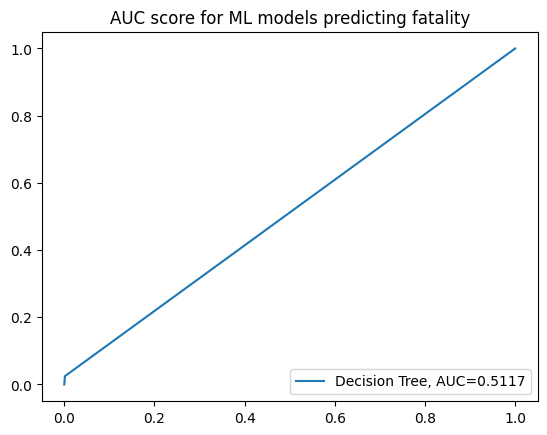

In [ ]:
# AUC curve
from sklearn.metrics import roc_curve

# https://www.statology.org/plot-multiple-roc-curves-python/

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
auc = round(roc_auc_score(y_test, y_pred_test), 4)
plt.plot(fpr, tpr, label="Decision Tree, AUC="+str(auc))
plt.title("AUC score for ML models predicting fatality")
plt.legend(loc='lower right')

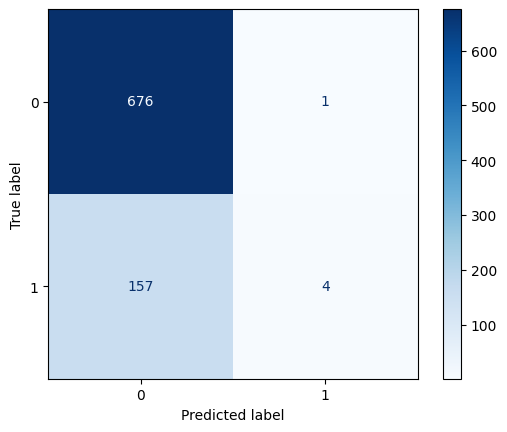

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if type(threshold)==bool :
  predictions = tree.predict(X_test)
else : 
  predictions = (tree.predict_proba(X_test)[:,1] >= 0.25).astype(int)

cm = confusion_matrix(y_test, predictions, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Printing metrics
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, labels=[1,2], average='micro')

from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions, labels=[1,2], average='micro')

from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions, labels=[1,2], average='micro')


print("Decision Tree ------------------------------------------")
print('Recall: ', round(recall, 3), ', Percision: ', round(precision, 3), ', F1: ', round(f1, 3)) 
print("\n\n")

# Calculate classification report
from sklearn.metrics import classification_report
print("Decision Tree ------------------------------------------")
print(classification_report(y_test, predictions,
                            target_names=["Non-Fatal", "Fatal"]))

Decision Tree ------------------------------------------
Recall:  0.025 , Percision:  0.8 , F1:  0.048



Decision Tree ------------------------------------------
              precision    recall  f1-score   support

   Non-Fatal       0.81      1.00      0.90       677
       Fatal       0.80      0.02      0.05       161

    accuracy                           0.81       838
   macro avg       0.81      0.51      0.47       838
weighted avg       0.81      0.81      0.73       838



## Learning Curve for Decision Tree

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits


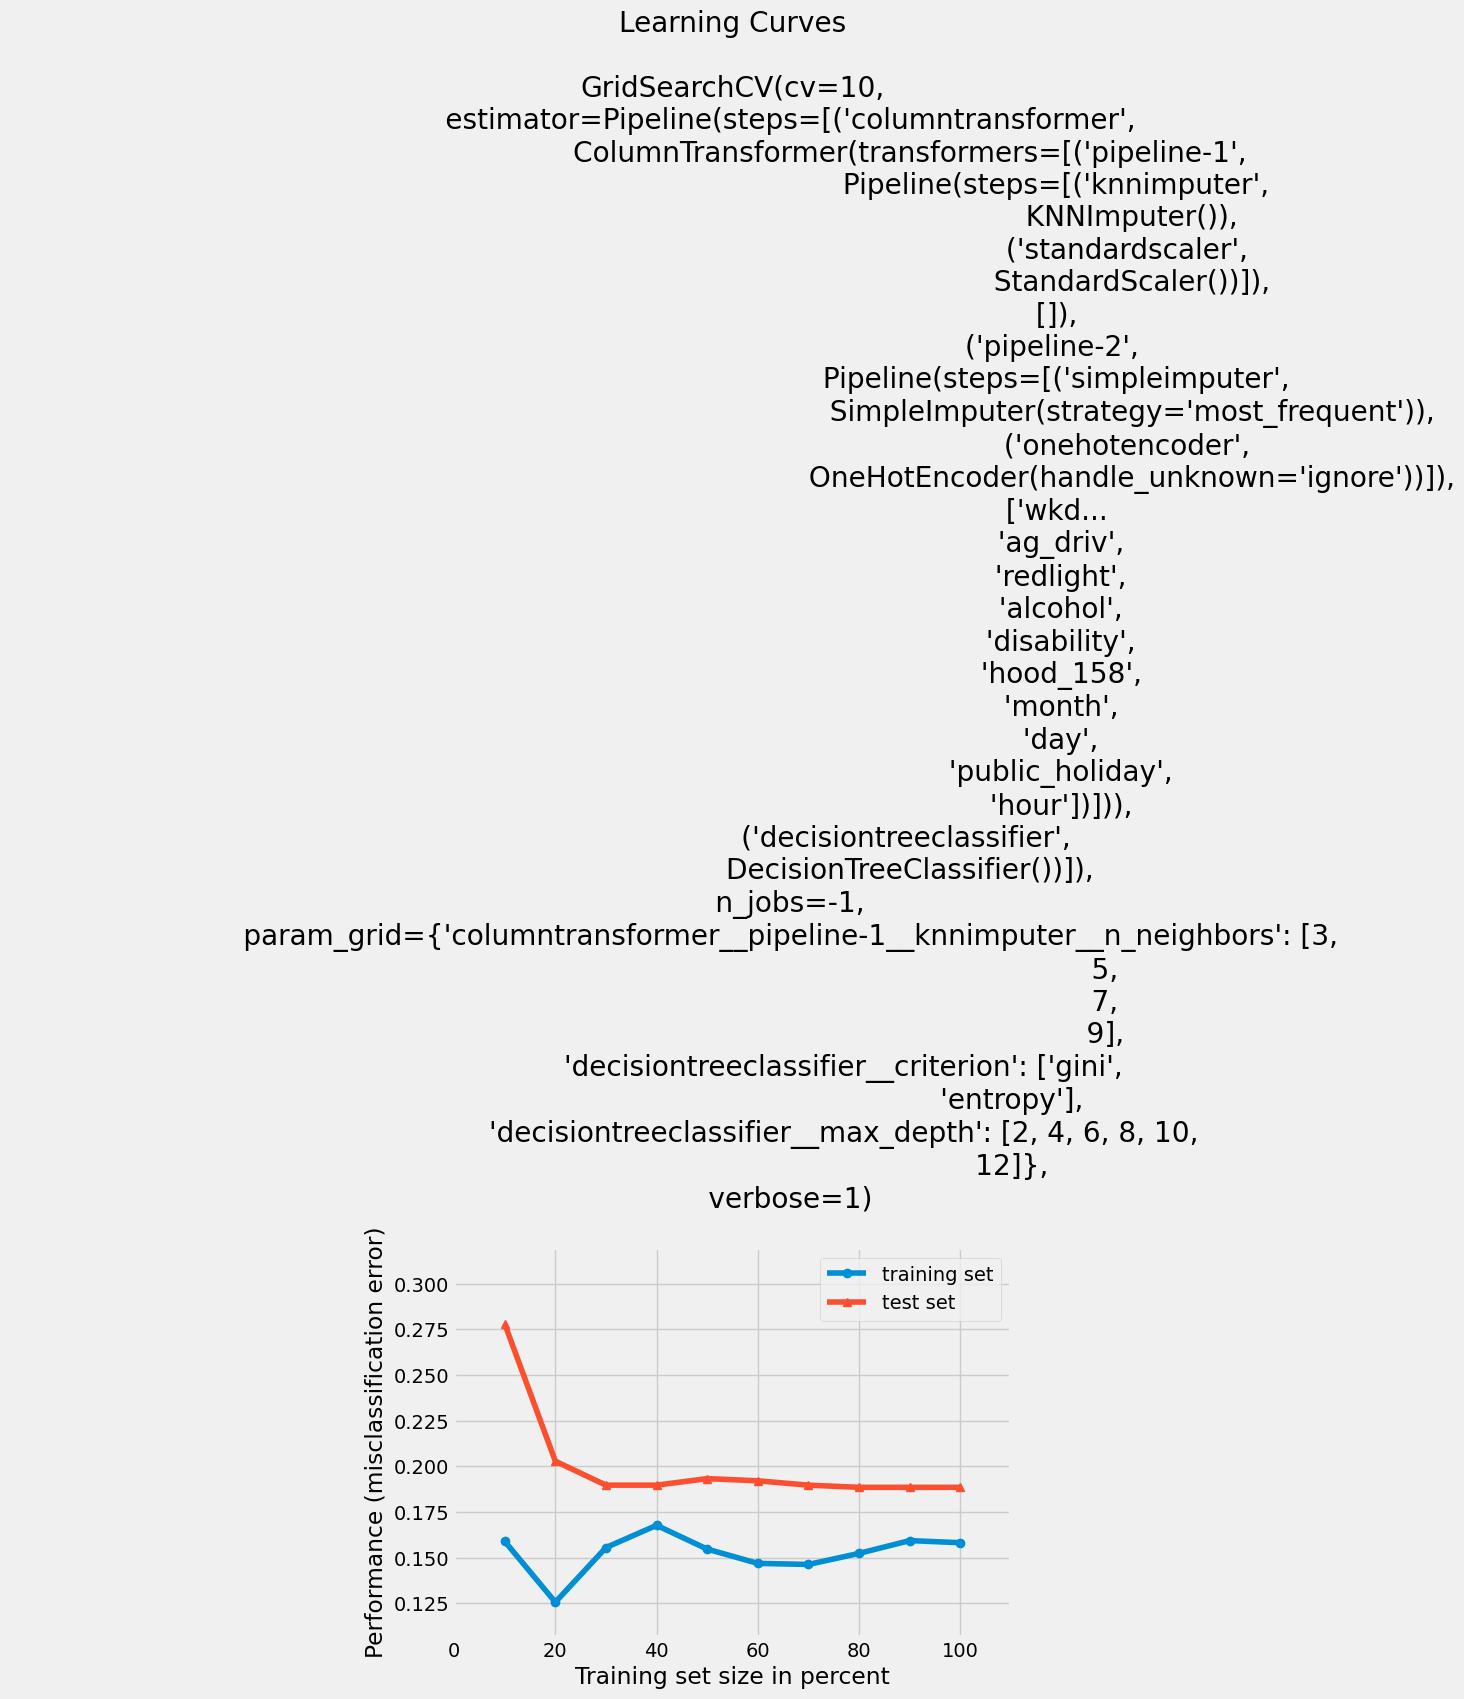

In [ ]:
# Learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, tree)
plt.show()

## Random Forest

In [ ]:
# Column types 
numeric_features = []#['wardnum']#, 'latitude', 'longitude']
categorical_features = [item for item in X_train.columns.values if item not in numeric_features]


# Build a numeric pipeline
numeric_transformer = make_pipeline(
    KNNImputer(),
    StandardScaler()
)

# Build a categorical pipeline
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# Build a column transformer
col_transformer = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features)
)

# Build a main pipeline
main_pipe = make_pipeline(col_transformer, 
                          RandomForestClassifier()
)

param_grid = {"randomforestclassifier__n_estimators" : [90, 100, 115, 130], 
              'randomforestclassifier__criterion': ['gini', 'entropy'], 
              "randomforestclassifier__max_depth" : range(2, 20),
              "randomforestclassifier__min_samples_leaf" : range(1, 10),
              "randomforestclassifier__min_samples_split" : range(2, 10),
              "randomforestclassifier__max_features" : ['auto', 'log2']
}

# Conduct grid search with 10 fold cross-validation
# grid_search = GridSearchCV(main_pipe, param_grid, cv=10, verbose=1, n_jobs=-1)
rf = RandomizedSearchCV(main_pipe, param_grid, cv=10, verbose=1, 
                        n_iter = 20, n_jobs=-1)

# Fit your pipeline with grid search 
rf.fit(X_train, y_train)

# Save the best hyperparameter values in an object named best_hyperparams
best_hyperparams = rf.best_params_

# Print best_hyperparams
print(best_hyperparams)

# Save your results in an object named `train_score`
train_score = rf.score(X_train, y_train)

# Display your score 
train_score

# Best model
rf_best = rf.best_estimator_
rf_best.score(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'randomforestclassifier__n_estimators': 115, 'randomforestclassifier__min_samples_split': 7, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'entropy'}


0.8433179723502304

In [ ]:
# Determine threshold to use
# threshold = 0.25 # Set to False if wanting to use no threshold

if type(threshold)==bool :
  y_pred_train = rf.predict_proba(X_train)[:,1]
  y_pred_test =  rf.predict_proba(X_test)[:,1]
else : 
  y_pred_train = (rf.predict_proba(X_train)[:,1] >= threshold).astype(int)
  y_pred_test =  (rf.predict_proba(X_test)[:,1] >= threshold).astype(int)


In [ ]:
# AUC score
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(y_train, y_pred_train) 
auc_test = roc_auc_score(y_test, y_pred_test)

auc_train, auc_test

(0.6777020820575628, 0.563322843747993)

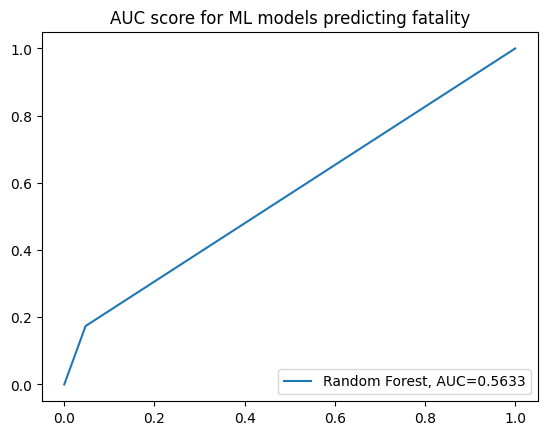

In [ ]:
# AUC curve
from sklearn.metrics import roc_curve

# https://www.statology.org/plot-multiple-roc-curves-python/

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
auc = round(roc_auc_score(y_test, y_pred_test), 4)
plt.plot(fpr, tpr, label="Random Forest, AUC="+str(auc))
plt.title("AUC score for ML models predicting fatality")
plt.legend(loc='lower right')

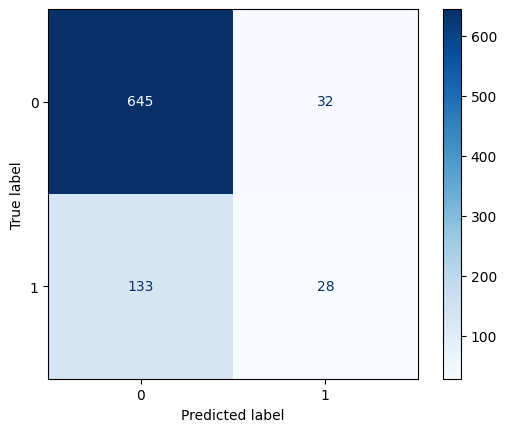

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if type(threshold)==bool :
  predictions = rf.predict(X_test)
else : 
  predictions = (rf.predict_proba(X_test)[:,1] >= 0.25).astype(int)

cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Printing metrics
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, labels=[1,2], average='micro')

from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions, labels=[1,2], average='micro')

from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions, labels=[1,2], average='micro')


print("Random Forest ------------------------------------------")
print('Recall: ', round(recall, 3), ', Percision: ', round(precision, 3), ', F1: ', round(f1, 3)) 
print("\n\n")

# Calculate classification report
from sklearn.metrics import classification_report
print("Random Forest ------------------------------------------")
print(classification_report(y_test, predictions,
                            target_names=["Non-Fatal", "Fatal"]))

Random Forest ------------------------------------------
Recall:  0.174 , Percision:  0.467 , F1:  0.253



Random Forest ------------------------------------------
              precision    recall  f1-score   support

   Non-Fatal       0.83      0.95      0.89       677
       Fatal       0.47      0.17      0.25       161

    accuracy                           0.80       838
   macro avg       0.65      0.56      0.57       838
weighted avg       0.76      0.80      0.76       838



## Learning Curves for Random Forest


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


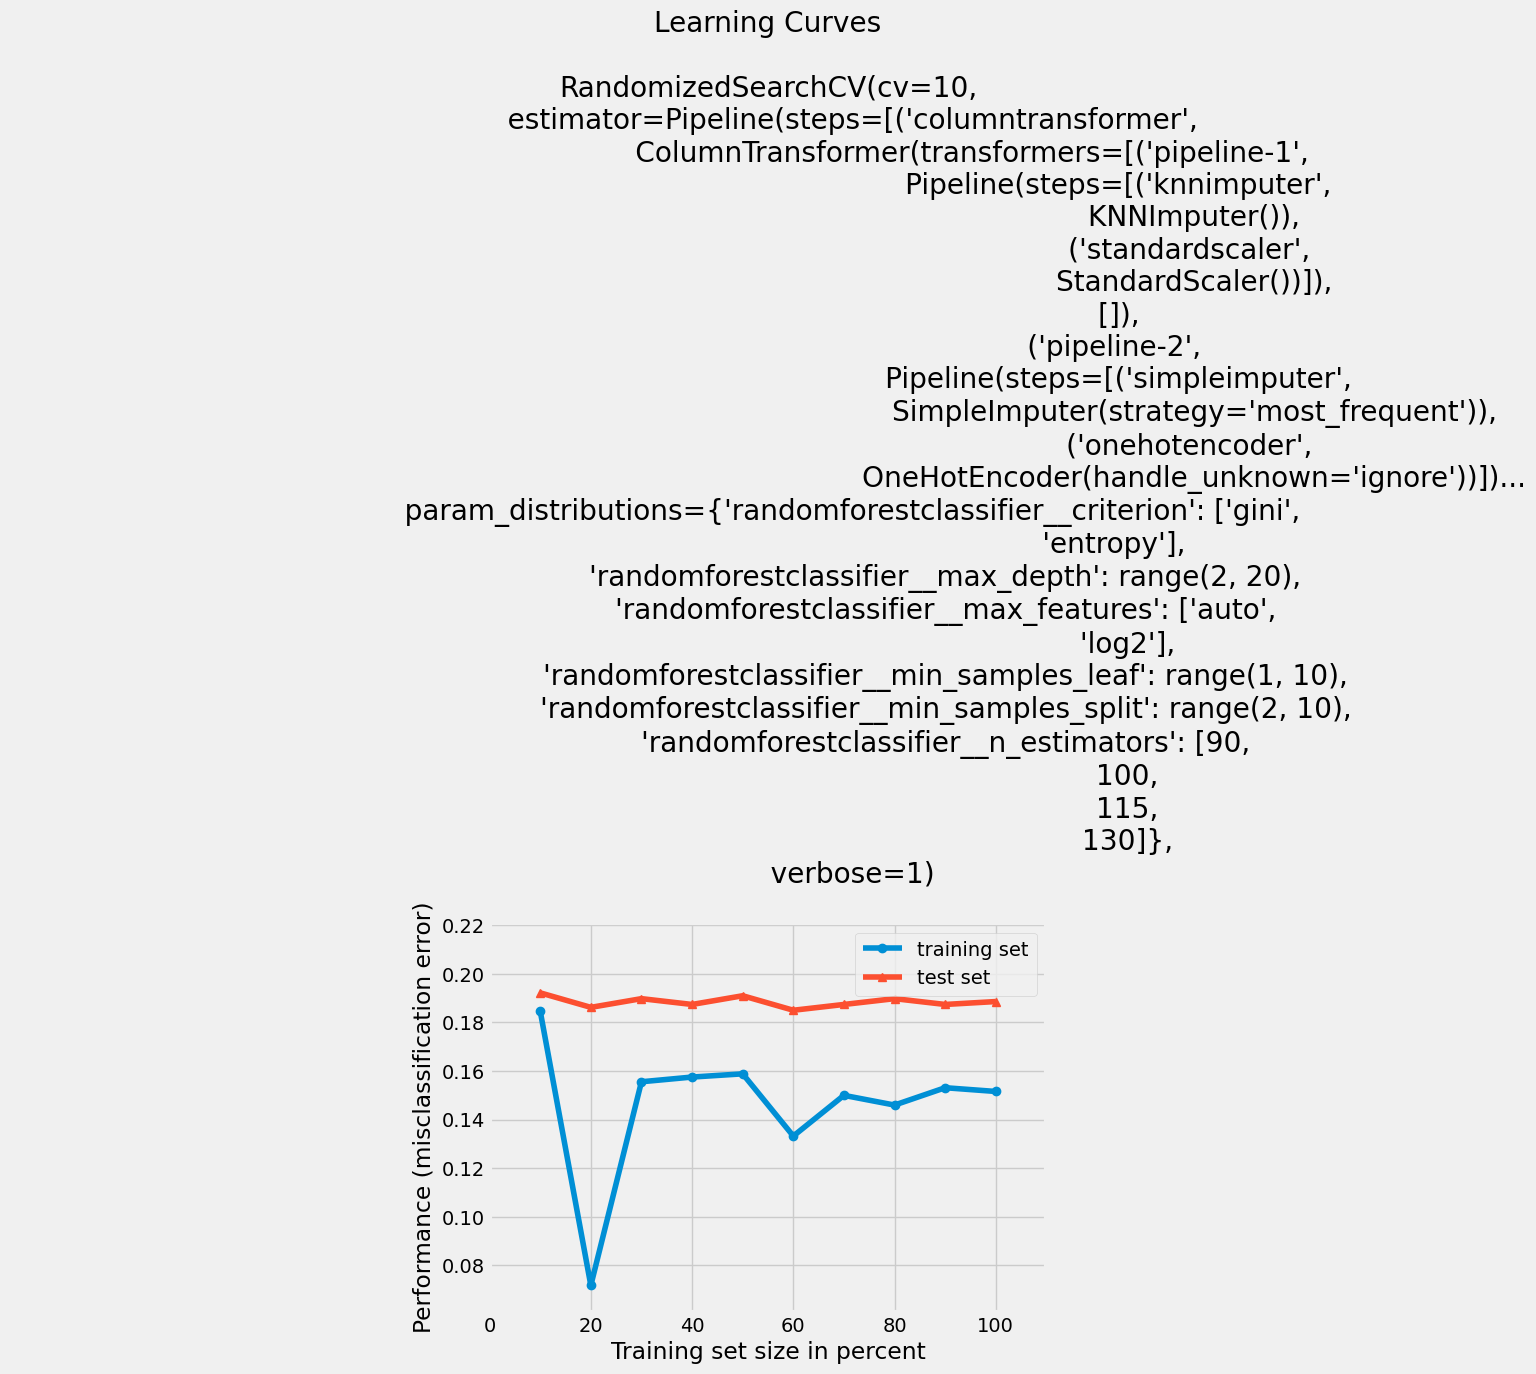

In [ ]:
# Learning cures
plot_learning_curves(X_train, y_train, X_test, y_test, rf)
plt.show()

## Voting Classifier


In [ ]:
# Creating Voting Ensemble
voting_clf = VotingClassifier(
               estimators=[('logistic', log), ('KNN', knn), ('dtree', tree), ('randf', rf)]
              ,voting='soft'
              )

In [ ]:
voting_clf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


VotingClassifier(estimators=[('logistic',
                              GridSearchCV(cv=10,
                                           estimator=Pipeline(steps=[('ct',
                                                                      ColumnTransformer(transformers=[('pipeline-1',
                                                                                                       Pipeline(steps=[('knnimputer',
                                                                                                                        KNNImputer()),
                                                                                                                       ('standardscaler',
                                                                                                                        StandardScaler())]),
                                                                                                       []),
                                                                                                      ('pipeline-2',
                                                                                                       Pipeline(steps=[('simpleimputer',
                                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                                       ('onehotencoder',
                                                                                                                        OneHotEncoder(handle_...
                                                 param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                                                            'entropy'],
                                                                      'randomforestclassifier__max_depth': range(2, 20),
                                                                      'randomforestclassifier__max_features': ['auto',
                                                                                                               'log2'],
                                                                      'randomforestclassifier__min_samples_leaf': range(1, 10),
                                                                      'randomforestclassifier__min_samples_split': range(2, 10),
                                                                      'randomforestclassifier__n_estimators': [90,
                                                                                                               100,
                                                                                                               115,
                                                                                                               130]},
                                                 verbose=1))],
                 voting='soft')

In [ ]:
# Metrics
for clf in (log, knn, tree, rf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("train:",clf.__class__.__name__, accuracy_score(y_train, clf.predict(X_train)))
    print("test:",clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print("==================================================================")

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

train: GridSearchCV 0.8412698412698413
test: GridSearchCV 0.8138424821002387
Fitting 10 folds for each of 18 candidates, totalling 180 fits
train: GridSearchCV 0.8428059395801332
test: GridSearchCV 0.8066825775656324
Fitting 10 folds for each of 48 candidates, totalling 480 fits
train: GridSearchCV 0.8417818740399385
test: GridSearchCV 0.8114558472553699
Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


train: RandomizedSearchCV 0.844342037890425
test: RandomizedSearchCV 0.8114558472553699


In [ ]:
# Save your results in an object named `voting_score`
voting_score = voting_clf.score(X_train, y_train)
voting_score

0.840757808499744

In [ ]:
# Determine threshold to use
# threshold = 0.25 # Set to False if wanting to use no threshold

if type(threshold)==bool :
  y_pred_train = voting_clf.predict_proba(X_train)[:,1]
  y_pred_test =  voting_clf.predict_proba(X_test)[:,1]
else : 
  y_pred_train = (voting_clf.predict_proba(X_train)[:,1] >= threshold).astype(int)
  y_pred_test =  (voting_clf.predict_proba(X_test)[:,1] >= threshold).astype(int)

In [ ]:
# AUC score
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(y_train, y_pred_train) 
auc_test = roc_auc_score(y_test, y_pred_test)

auc_train, auc_test

(0.6863259721371708, 0.5722221712524198)

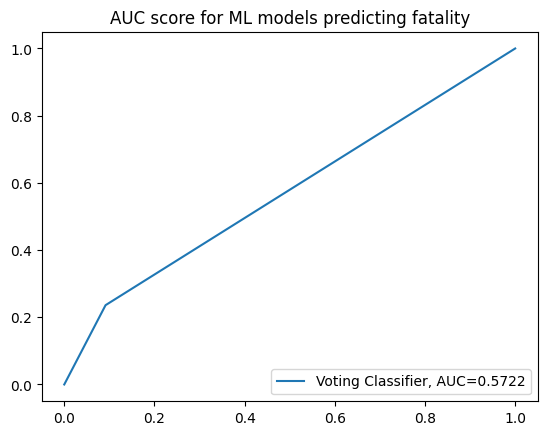

In [ ]:
# AUC curve
from sklearn.metrics import roc_curve

# https://www.statology.org/plot-multiple-roc-curves-python/

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
auc = round(roc_auc_score(y_test, y_pred_test), 4)
plt.plot(fpr, tpr, label="Voting Classifier, AUC="+str(auc))
plt.title("AUC score for ML models predicting fatality")
plt.legend(loc='lower right')

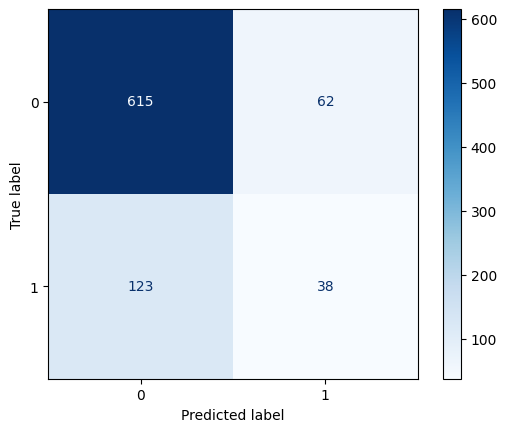

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if type(threshold)==bool :
  predictions = voting_clf.predict(X_test)
else : 
  predictions = (voting_clf.predict_proba(X_test)[:,1] >= 0.25).astype(int)

cm = confusion_matrix(y_test, predictions, labels=voting_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()